In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
%matplotlib inline

In [4]:
df = pd.read_csv("Raw_House_all_properties/June/houses_properties_data_June.csv", low_memory = False)

In [53]:
##We have to use the Senior Community too important
df['resoFacts.levels'].unique()

array(['One', nan, 'Two', 'One and One Half', 'Three Or More',
       'Multi/Split'], dtype=object)

In [56]:
##Needs a deeper look into levels
df.loc[df['resoFacts.levels'].isnull()]['streetAddress'].tolist()

['626 Segundo Dr',
 '155 Quail Chase Ln',
 '3020 Sundial Ln',
 '1309 Longbow Trl',
 '3513 Kales Ln',
 '4938 Livingston Dr',
 '2152 Cardinal Blvd',
 '7370 Sevier Wells Rd',
 '870 Greenbriar Ln',
 '5857 Summer Star Ln',
 '305 S Fm 1138',
 '1300 Granite Path',
 '6036 Frontier Ln',
 '606 Ivy Ln',
 '400 Woodhollow Dr',
 '10416 Napa Valley Dr',
 '13504 Hemlock Trl',
 '1524 Tanglewood Dr',
 '944 Royal Ln',
 '8209 San Bernard Trl #3',
 '824 Kennedy Dr',
 '1230 Aberdeen Dr',
 '3220 Berry Holw',
 '14618 Turnbridge Dr',
 '8152 Shady Brook Ln',
 '120 Cindy Ln',
 '301 Wood Hollow Dr',
 '618 Parkdale Ave',
 '2932 Malcolm St',
 '4716 Poppy Dr E',
 '2021 Mountainview Dr',
 '2905 Eagles Nest Dr',
 '1236 Sierra Blanca Dr',
 '8409 Horse Whisper Ln',
 '4616 Bellefontaine Ct',
 '8213 Wildwest Dr',
 '5805 Mountainwood Dr',
 '521 Evergreen Dr',
 '9000 Cheswick Dr',
 '1716 Wassel Rd',
 '4816 Tamanaco Ct',
 '6000 Bransford Rd',
 '2517 Plains Trl',
 '731 Hill St',
 '1705 Stags Leap Trl',
 '21 Mont Del Dr',
 '86

In [48]:
df.loc[df['zpid'] == 78943653]['streetAddress']

33    1509 Shady Ln
Name: streetAddress, dtype: object

In [39]:
list1 = df.columns.tolist()
list(set(list1) - set(chosen_columns))

['resoFacts.parcelNumber',
 'listingProvider.postingWebsiteURL',
 'resoFacts.zoningDescription',
 'listingProvider.enhancedDescriptionText',
 'resoFacts.associationFee2',
 'rentZestimate',
 'resoFacts.irrigationWaterRightsYN',
 'listingProvider.disclaimerText',
 'address.city',
 'resoFacts.otherFacts',
 'resoFacts.builderName',
 'listed_by.phone.areacode',
 'resoFacts.inclusions',
 'resoFacts.mainLevelBedrooms',
 'resoFacts.attic',
 'resoFacts.gas',
 'zestimate',
 'resoFacts.depositsAndFees',
 'listed_by.agent_reason',
 'resoFacts.livingAreaRange',
 'resoFacts.furnished',
 'resoFacts.otherStructures',
 'resoFacts.lotSizeDimensions',
 'pageViewCount',
 'url',
 'resoFacts.hasOpenParking',
 'resoFacts.associationName',
 'listed_by.badge_type',
 'comingSoonOnMarketDate',
 'resoFacts.waterView',
 'resoFacts.listAOR',
 'resoFacts.stories',
 'buildingPermits',
 'resoFacts.additionalParcelsDescription',
 'resoFacts.doorFeatures',
 'resoFacts.incomeIncludes',
 'resoFacts.electric',
 'resoFacts.

In [5]:
chosen_columns = ['zpid', 'isListedByOwner', 'resoFacts.isSeniorCommunity', 'resoFacts.yearBuilt', 'resoFacts.hasAssociation', 'resoFacts.associationFeeIncludes', 
                  'annualHomeownersInsurance', 'monthlyHoaFee', 'resoFacts.hoaFee', 'resoFacts.patioAndPorchFeatures', 
                  'resoFacts.lotFeatures', 'resoFacts.sewer', 'resoFacts.waterSource', 'schools',
                  'resoFacts.elementarySchool', 'resoFacts.elementarySchoolDistrict', 'resoFacts.middleOrJuniorSchool', 
                  'resoFacts.highSchool', 'resoFacts.highSchoolDistrict', 'resoFacts.middleOrJuniorSchoolDistrict', 
                  'resoFacts.pricePerSquareFoot', 'livingAreaValue', 'resoFacts.exteriorFeatures', 'resoFacts.hasPrivatePool',
                  'resoFacts.poolFeatures', 'resoFacts.laundryFeatures',
                  'resoFacts.propertySubType', 'resoFacts.interiorFeatures', 'solarPotential.sunScore', 'solarPotential.buildFactor',
                  'solarPotential.climateFactor', 'solarPotential.electricityFactor', 'solarPotential.solarFactor', 
                  'resoFacts.hasCooling', 'resoFacts.cooling', 'resoFacts.hasHeating', 'resoFacts.heating', 
                  'resoFacts.structureType', 'resoFacts.windowFeatures', 'resoFacts.architecturalStyle', 'resoFacts.vegetation', 
                  'resoFacts.fencing', 'resoFacts.greenEnergyEfficient', 'resoFacts.taxAnnualAmount', 'resoFacts.foundationDetails', 
                  'resoFacts.canRaiseHorses', 'resoFacts.utilities', 'resoFacts.hasGarage', 'resoFacts.hasAttachedGarage', 
                  'resoFacts.hasCarport', 'resoFacts.carportSpaces', 'resoFacts.parkingFeatures', 'resoFacts.garageSpaces', 
                  'resoFacts.parking',
                  'resoFacts.hasSpa', 'resoFacts.hasView', 'resoFacts.homeType', 'resoFacts.rooms', 'resoFacts.coveredSpaces', 
                  'resoFacts.constructionMaterials', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.basement', 'bedrooms',
                  'resoFacts.communityFeatures', 'resoFacts.bathrooms', 'resoFacts.bathroomsHalf', 'resoFacts.bathroomsFull', 
                  'resoFacts.hasLandLease', 'resoFacts.hasFireplace', 'resoFacts.fireplaces', 'resoFacts.fireplaceFeatures', 
                  'resoFacts.levels', 'resoFacts.securityFeatures', 'resoFacts.roofType', 'streetAddress', 'longitude', 'latitude', 
                  'zipcode', 'countyId', 'city', 'resoFacts.buyerAgencyCompensation', 'resoFacts.buyerAgencyCompensationType', 
                  'favoriteCount', 'resoFacts.isNewConstruction', 'mortgageRates.fifteenYearFixedRate', 
                  'mortgageRates.thirtyYearFixedRate', 'mortgageRates.arm5Rate', 'propertyTaxRate', 'price']

##We should do this later
time_columns = ['resoFacts.onMarketDate', 'resoFacts.daysOnZillow', 'mortgageRates.fifteenYearFixedRate', 
                'mortgageRates.thirtyYearFixedRate', 'taxHistory', 'priceHistory']

In [4]:
df2 = df.copy()[chosen_columns]

##Remember we have a list of counties run through a loop 
##The order of that list can determine the number that represents the counties
##'wise county, tx', 'denton county, tx', 'collin county, tx', 'parker county, tx', 'tarrant county, tx', 
##'dallas county, tx', 'rockwall county, tx', 'kaufman county, tx', 'johnson county, tx', 'ellis county, tx'
##Follow the order of the county above, these numbers represents these counties respectively.

df2['countyId'].unique()

array([ 333,  988,  951, 1308, 2049,  978, 2516, 1833, 1827,  498])

In [5]:
##nan here is actually a float number
##Replaces null values with ['None'] or sth
##Create columns based on lists within a row's variable
##Columns that have this:
# 'resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
# 'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
# 'resoFacts.vegetation', 'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
# 'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
# 'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
# 'resoFacts.propertySubType', 'resoFacts.securityFeatures', 'resoFacts.associationFeeIncludes', 
# 'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
# 'resoFacts.poolFeatures'

##utilities that is null can be seen as electricity
##For green energy, we can create a column where if it has green energy or not

##Fill null sun score values with mean or median of sun scores in the zip code area
##resoFacts.hasAssociation is if the house has HOA or not
##resoFacts.taxAnnualAmount: The annual amount is currently this year
##resoFacts.basement: Fill the nan values with None
##resoFacts.buyerAgencyCompensation: Only numbers should be there, no percent signs
##resoFacts.levels: How many levels are there in the house
##For roofType if a string contains multiple types, separate them
##Other columns: 'resoFacts.fencing', 'resoFacts.architecturalStyle', 'resoFacts.structureType'
##Houses can have fireplaces but they don't have the number of fireplaces
##All of these rates (mortgage rates, property tax rate) are from 06/04/2022
##resoFacts.rooms: Using this feature to get other specific rooms like kitchens
##slate and cedar tiles for roofing can have a bad impact on solar potential score
##resoFacts.coveredSpaces: Spaces outside the home that are covered by roofs, etc.
##resoFacts.parking: The total number of cars can be parked at a house (resoFacts.garageSpaces and resoFacts.carportSpaces)

In [6]:
df2.isnull().sum()

zpid                                     0
isListedByOwner                          1
resoFacts.yearBuilt                      5
resoFacts.hasAssociation                17
resoFacts.associationFeeIncludes      4269
                                      ... 
mortgageRates.fifteenYearFixedRate       5
mortgageRates.thirtyYearFixedRate        5
mortgageRates.arm5Rate                   5
propertyTaxRate                          0
price                                    0
Length: 89, dtype: int64

## Is the column isListedByOwner worth to be kept?

In [7]:
df2.isListedByOwner.value_counts()

False    9144
True       14
Name: isListedByOwner, dtype: int64

In [8]:
##Let's look into their price distribution
df2.loc[(df2['isListedByOwner'].isnull()) | (df2['isListedByOwner'] == True)][['streetAddress', 'price']]

,streetAddress,price
1364,2105 Bayshore Dr,5349000
1973,3000 Foxboro Dr,450000
1985,2209 Tralee Cir,435000
2104,8063 County Road 172,599000
2474,502 Shadow Glen Trl,649900
2671,15247 Shellwood Ln,739900
2799,5125 Meadowlark Dr,1150000
5524,249 Wimberley Dr,1129000
5879,1313 W Walnut St,239999
6063,3407 Timberview Rd,374790


In [9]:
df2.loc[df2['price']==0]

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,resoFacts.associationFeeIncludes,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,resoFacts.patioAndPorchFeatures,resoFacts.lotFeatures,...,city,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price
1343,2062990249,False,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Frisco,NaN,NaN,21,NaN,NaN,NaN,NaN,1.15,0
1441,2064191769,False,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Frisco,NaN,NaN,102,NaN,NaN,NaN,NaN,1.15,0
2560,2062986069,False,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,McKinney,NaN,NaN,2,NaN,NaN,NaN,NaN,2.13,0
3945,28920296,False,1955.0,True,['Full Use of Facilities'],0,15.0,$175 annually,NaN,"['Many Trees', 'No Backyard Grass']",...,Fort Worth,2.5,%,389,False,NaN,NaN,NaN,2.34,0


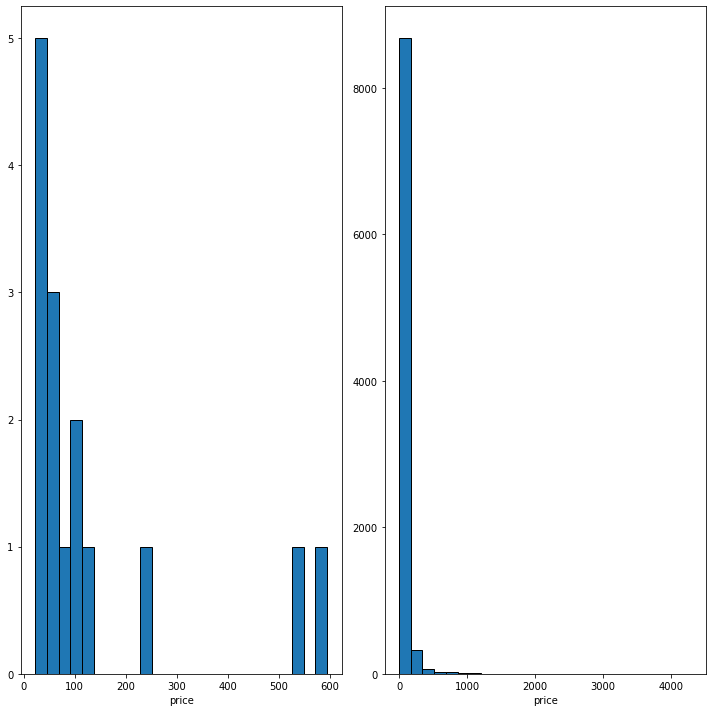

In [10]:
##Just a quick overview, there are houses that are around $10 million dollars or more.
##Since visually they have the same distribution, we don't need to use this column 
fig, ax = plt.subplots(1, 2, figsize = (10,10))
price_ListedOwner = df2.loc[(df2['isListedByOwner'].isnull()) | (df2['isListedByOwner'] == True)]['price']
price_NotListedOwner = df2.loc[df2['isListedByOwner'] == False]['price']
ax[0].hist(price_ListedOwner/10000, edgecolor = 'black', bins = 25, density = False)
ax[1].hist(price_NotListedOwner/10000, edgecolor = 'black', bins = 25, density = False)
ax[0].set_xlabel('price', loc = 'center')
ax[1].set_xlabel('price', loc = 'center')
fig.tight_layout()
plt.show()

In [5]:
df2.columns.tolist()

['zpid',
 'isListedByOwner',
 'resoFacts.yearBuilt',
 'resoFacts.hasAssociation',
 'resoFacts.associationFeeIncludes',
 'annualHomeownersInsurance',
 'monthlyHoaFee',
 'resoFacts.hoaFee',
 'resoFacts.patioAndPorchFeatures',
 'resoFacts.lotFeatures',
 'resoFacts.sewer',
 'resoFacts.waterSource',
 'schools',
 'resoFacts.elementarySchool',
 'resoFacts.elementarySchoolDistrict',
 'resoFacts.middleOrJuniorSchool',
 'resoFacts.highSchool',
 'resoFacts.highSchoolDistrict',
 'resoFacts.middleOrJuniorSchoolDistrict',
 'resoFacts.pricePerSquareFoot',
 'livingAreaValue',
 'resoFacts.exteriorFeatures',
 'resoFacts.hasPrivatePool',
 'resoFacts.poolFeatures',
 'resoFacts.laundryFeatures',
 'resoFacts.propertySubType',
 'resoFacts.interiorFeatures',
 'solarPotential.sunScore',
 'solarPotential.buildFactor',
 'solarPotential.climateFactor',
 'solarPotential.electricityFactor',
 'solarPotential.solarFactor',
 'resoFacts.hasCooling',
 'resoFacts.cooling',
 'resoFacts.hasHeating',
 'resoFacts.heating',
 

In [6]:
df2.countyId.unique()

array([ 333,  988,  951, 1308, 2049,  978, 2516, 1833, 1827,  498])

# Changing county id

In [4]:
##'wise county, tx', 'denton county, tx', 'collin county, tx', 'parker county, tx', 'tarrant county, tx', 
##'dallas county, tx', 'rockwall county, tx', 'kaufman county, tx', 'johnson county, tx', 'ellis county, tx'
##We can use a dictionary here, but what if there is a place that don't have a county
def county(number):
    if number == 333:
        return 'wise'
    elif number == 988:
        return 'denton'
    elif number == 951:
        return 'collin'
    elif number == 1308:
        return 'parker'
    elif number == 2049:
        return 'tarrant'
    elif number == 978:
        return 'dallas'
    elif number == 2516:
        return 'rockwall'
    elif number == 1833:
        return 'kaufman'
    elif number == 1827:
        return 'johnson'
    elif number == 498:
        return 'ellis'
    else:
        return 'None'

In [5]:
df2['county'] = df2['countyId'].apply(county)

NameError: name 'df2' is not defined

In [15]:
df2[['county', 'streetAddress']]

,county,streetAddress
0,wise,2104 16th St
1,wise,509 Pettit Dr
2,wise,813 E Highway 114
3,wise,105 Dodge City Ct
4,wise,1412 Hovey St
...,...,...
9154,ellis,4218 Fm 66
9155,ellis,971 Bells Chapel Rd
9156,ellis,145 Hartsfield Dr
9157,ellis,1765 N Mockingbird Ln


# Dealing with list variables within columns

In [16]:
##Replaces null values with ['None'] or sth
##Create columns based on lists within a row's variable
##Columns that have this: 
# 'resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
# 'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
# 'resoFacts.vegetation', 'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
# 'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
# 'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
# 'resoFacts.propertySubType', 'resoFacts.securityFeatures', 'resoFacts.associationFeeIncludes', 
# 'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
# 'resoFacts.poolFeatures'

In [4]:
lists_string_column = ['resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
                       'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
                       'resoFacts.vegetation', 'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
                       'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
                       'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
                       'resoFacts.propertySubType', 'resoFacts.securityFeatures', 'resoFacts.associationFeeIncludes', 
                       'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
                       'resoFacts.poolFeatures']

list_dict_column = ['schools']

In [18]:
df2['resoFacts.propertySubType'].unique()

array(["['Single Family Residence']", nan, "['Farm']", "['Townhouse']",
       "['Ranch']"], dtype=object)

In [19]:
##This line replace null values of list variables columns with "['None']"
for col in lists_string_column:
    df2.loc[df2[col].isnull(), col] = "['None']"

In [20]:
df2['resoFacts.propertySubType'].unique()

array(["['Single Family Residence']", "['None']", "['Farm']",
       "['Townhouse']", "['Ranch']"], dtype=object)

In [21]:
df2['resoFacts.patioAndPorchFeatures'].unique()

array(["['None']", "['Covered', 'Front Porch', 'Patio']", "['Covered']",
       "['Awning(s)', 'Deck']",
       "['Covered', 'Deck', 'Front Porch', 'Roof Top Deck/Patio', 'Wrap Around']",
       "['Patio']", "['Covered', 'Rear Porch']",
       "['Front Porch', 'Rear Porch']", "['Covered', 'Front Porch']",
       "['Covered', 'Deck']", "['Covered', 'Deck', 'Patio']",
       "['Covered', 'Patio']", "['Deck']",
       "['Covered', 'Deck', 'Front Porch', 'Rear Porch']",
       "['Covered', 'Front Porch', 'Patio', 'Screened']",
       "['Covered', 'Front Porch', 'Rear Porch']",
       "['Covered', 'Patio', 'Rear Porch']",
       "['Covered', 'Front Porch', 'Patio', 'See Remarks']",
       "['Covered', 'Front Porch', 'Patio', 'Wrap Around']",
       "['Covered', 'Patio', 'Rear Porch', 'Side Porch']",
       "['Front Porch']", "['Covered', 'Rear Porch', 'Side Porch']",
       "['Patio', 'Other']",
       "['Awning(s)', 'Covered', 'Front Porch', 'Patio', 'Rear Porch']",
       "['Covered', 'De

In [22]:
list_feature = list()
list_temp = df2[lists_string_column[0]].unique()

In [23]:
df2[lists_string_column[0]].unique()[1][0]

'['

In [24]:
df2[lists_string_column[0]].unique()[1][-1]

']'

In [25]:
df2[lists_string_column[0]].unique()[4][1:-1].replace("'", "").replace(" ", "").split(",")

['Covered', 'Deck', 'FrontPorch', 'RoofTopDeck/Patio', 'WrapAround']

In [26]:
df2[lists_string_column[0]].unique()[0][1:-1].replace("'", "").replace(" ", "").split(",")

['None']

In [27]:
##Let's try on one of the column first
##Transform these lists of variables into columns
##If a house has for example 'Covered Patio only', check 1 for 'Covered' and check 0 for the rest 

list_feature = list()
list_temp = df2[lists_string_column[0]].unique()
for feature in list_temp:
    list1 = feature[1:-1].replace("'", "").replace(" ", "").split(",")
    for value in list1:
        if value not in list_feature:
            list_feature.append(value)

In [28]:
list_feature

['None',
 'Covered',
 'FrontPorch',
 'Patio',
 'Awning(s)',
 'Deck',
 'RoofTopDeck/Patio',
 'WrapAround',
 'RearPorch',
 'Screened',
 'SeeRemarks',
 'SidePorch',
 'Other',
 'Enclosed',
 'Terrace',
 'GlassEnclosed',
 'CoveredPatio',
 'CoveredPorch(es)',
 'Porch']

#### Turn this into a function for the dataframe

In [29]:
string1 = 'resoFacts.patioAndPorchFeatures'
string1.split(".")

['resoFacts', 'patioAndPorchFeatures']

In [6]:
def county(number):
    if number == 333:
        return 'wise'
    elif number == 988:
        return 'denton'
    elif number == 951:
        return 'collin'
    elif number == 1308:
        return 'parker'
    elif number == 2049:
        return 'tarrant'
    elif number == 978:
        return 'dallas'
    elif number == 2516:
        return 'rockwall'
    elif number == 1833:
        return 'kaufman'
    elif number == 1827:
        return 'johnson'
    elif number == 498:
        return 'ellis'
    else:
        return 'None'

##Fill the null values with "['None']" for columns with list variables in string form
def fill_null_values(df, col):
    df.loc[df[col].isnull(), col] = "['None']"
    return df

##Transform these lists of variables into columns:
##If next time we end up with a extra column, we can add that extra column to sql
def categorical_features_generator(df, col):
    list_feature = list()
    list_temp = df[col].unique()
    for feature in list_temp:
        list1 = feature[1:-1].replace("'", "").replace(" ", "").split(",")
        for value in list1:
            if value not in list_feature:
                list_feature.append(value)
    return list_feature

##Transform the rows values into type list to fill in 1 and 0's for these new features
def row_categorical_extract(variable, feature):
    list1 = variable[1:-1].replace("'", "").replace(" ", "").split(",")
    if feature in list1:
        return 1
    else:
        return 0

##After getting the list feature from that function,
##We create a new dataframe with all of those features, include the zpid
def create_categorical_columns(df, col, list_feature): 
    ##We split the column name from resoFacts to look cleaner
    name = col.split(".")[1]
    columns = list()
    for feature in list_feature:
        df[name + "_" + feature] = df.apply(lambda x: row_categorical_extract(x[col], feature), axis = 1)
        columns.append(name + "_" + feature)
    return df, columns, name

##Create a subdataframe with all the values generated above with zpid
def sub_dataframe(df, columns):
    new_columns = ['zpid'] + columns
    return df[new_columns]

In [5]:
##Test out the functions above
##Worked well, do it for all of the columns
df2 = df.copy()[chosen_columns]
df2['county'] = df2['countyId'].apply(county)
col = 'resoFacts.patioAndPorchFeatures'
df3 = fill_null_values(df2, col)
list_feature = categorical_features_generator(df3, col)
df3, columns, name = create_categorical_columns(df3, col, list_feature)
df_sub = sub_dataframe(df3, columns)

In [12]:
df_sub.loc[df_sub['patioAndPorchFeatures_Screened'] == 1]

,zpid,patioAndPorchFeatures_None,patioAndPorchFeatures_Covered,patioAndPorchFeatures_FrontPorch,patioAndPorchFeatures_Patio,patioAndPorchFeatures_Awning(s),patioAndPorchFeatures_Deck,patioAndPorchFeatures_RoofTopDeck/Patio,patioAndPorchFeatures_WrapAround,patioAndPorchFeatures_RearPorch,patioAndPorchFeatures_Screened,patioAndPorchFeatures_SeeRemarks,patioAndPorchFeatures_SidePorch,patioAndPorchFeatures_Other,patioAndPorchFeatures_Enclosed,patioAndPorchFeatures_Terrace,patioAndPorchFeatures_GlassEnclosed,patioAndPorchFeatures_CoveredPatio,patioAndPorchFeatures_CoveredPorch(es),patioAndPorchFeatures_Porch
95,112328478,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
222,78945642,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
309,305796947,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
436,2067219797,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
617,65699605,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,199424263,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8711,28628317,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
9118,122317086,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
9121,202684618,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [7]:
lists_string_column = ['resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
                       'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
                       'resoFacts.vegetation', 'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
                       'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
                       'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
                       'resoFacts.propertySubType', 'resoFacts.securityFeatures', 'resoFacts.associationFeeIncludes', 
                       'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
                       'resoFacts.poolFeatures' ]

list_dict_column = ['schools']

In [8]:
##Do this for all of the columns and save them into csv files

df2 = df.copy()[chosen_columns]
df2['county'] = df2['countyId'].apply(county)
df_dict = dict()

for col in lists_string_column:
    
    ##Creating sub dataframes from df3
    df3 = fill_null_values(df2, col)
    print(col)
    list_feature = categorical_features_generator(df3, col)
    df3, columns, name = create_categorical_columns(df3, col, list_feature)
    df_sub = sub_dataframe(df3, columns)
    
    ##Drop all of these columns, including the original names after the extraction
    df3.drop(labels = columns + [col], axis = 1, inplace = True)
    
    ##Append the dataframes into a list and save them (Changed)
    ##Do dictionary for easier access later on
    df_dict[col] = df_sub
    #df_sub.to_csv("houses_" + name + ".csv", index = False)

resoFacts.patioAndPorchFeatures
resoFacts.waterSource
resoFacts.exteriorFeatures
resoFacts.interiorFeatures
resoFacts.communityFeatures
resoFacts.constructionMaterials
resoFacts.vegetation
resoFacts.greenEnergyEfficient
resoFacts.foundationDetails
resoFacts.utilities
resoFacts.appliances
resoFacts.flooring
resoFacts.parkingFeatures
resoFacts.lotFeatures
resoFacts.fireplaceFeatures
resoFacts.laundryFeatures
resoFacts.propertySubType
resoFacts.securityFeatures
resoFacts.associationFeeIncludes
resoFacts.cooling
resoFacts.windowFeatures
resoFacts.heating
resoFacts.sewer
resoFacts.poolFeatures


In [7]:
df_dict['resoFacts.cooling']

,zpid,cooling_CeilingFan(s),cooling_WindowUnit(s),cooling_CentralAir,cooling_None,cooling_Other,cooling_Electric,cooling_AtticFan,cooling_MultiUnits,cooling_WallUnit(s),...,cooling_HeatPump,cooling_Wall/WindowUnit(s),cooling_ENERGYSTARQualifiedEquipment,cooling_Zoned,cooling_RoofTurbine(s),cooling_HumidityControl,cooling_EvaporativeCooling,cooling_Geothermal,cooling_CentralElectric,cooling_Wall
0,78936675,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,220112341,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220098477,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118592172,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78936620,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,67640330,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9155,67626300,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9156,2069193508,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9157,98880661,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
##543 columns total from all of these features
##df_list: contains all of the dataframes that have been binarized based on their corresponding columns (CHANGED)
##We have changed to df_dict
count = 0
for col in lists_string_column:
    df_temporary = df_dict[col]
    count += df_temporary.shape[1] - 1
print(count)

699


In [21]:
##So df2 is also affected by the changes too. But let's just stick with df3
##Let's look at schools
df3

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,resoFacts.elementarySchool,resoFacts.elementarySchoolDistrict,...,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price,county
0,2.201112e+08,False,1998.0,True,819.0,4.0,$50 annually,[{'link': 'https://www.greatschools.org/school...,Bridgeport,Bridgeport ISD,...,3.00,%,7.0,False,4.832,5.611,5.400,1.47,195000.0,wise
1,2.201135e+08,False,2007.0,False,714.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Jacksboro,Jacksboro ISD,...,3,%,44.0,False,4.832,5.611,5.400,1.47,169999.0,wise
2,2.201123e+08,False,1980.0,False,584.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Sevenhills,Northwest ISD,...,3,%,24.0,False,4.832,5.611,5.400,1.47,139000.0,wise
3,2.062150e+09,False,9999.0,False,672.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Bridgeport,Bridgeport ISD,...,3,%,29.0,False,4.832,5.611,5.400,1.47,160000.0,wise
4,2.200980e+08,False,1975.0,False,840.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Chico,Chico ISD,...,3,%,60.0,False,4.832,5.611,5.400,1.47,200000.0,wise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15413,3.312331e+08,False,2023.0,False,5208.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Oliver Clift,Waxahachie ISD,...,3,%,9.0,False,4.767,5.339,4.793,1.86,1240000.0,ellis
15414,9.889037e+07,False,1987.0,False,7749.0,NaN,NaN,[{'link': 'https://www.greatschools.org/school...,Ingram,Ferris ISD,...,2%,%,8.0,False,4.767,5.339,4.793,1.86,1845000.0,ellis
15415,2.062626e+09,False,2022.0,True,3990.0,83.0,"$1,000 annually",[{'link': 'https://www.greatschools.org/school...,Larue Miller,Midlothian ISD,...,5%,%,4.0,True,4.767,5.339,4.793,1.86,949900.0,ellis
15416,2.063005e+09,False,2022.0,True,3780.0,163.0,"$1,950 annually",[{'link': 'https://www.greatschools.org/school...,Larue Miller,Midlothian ISD,...,5,%,0.0,True,4.767,5.339,4.793,1.86,899900.0,ellis


# Deal with schools

In [10]:
df3[['schools',  'resoFacts.elementarySchool', 'resoFacts.elementarySchoolDistrict', 'resoFacts.middleOrJuniorSchool',
     'resoFacts.middleOrJuniorSchoolDistrict', 'resoFacts.highSchool', 'resoFacts.highSchoolDistrict']].iloc[9100]

schools                                   [{'link': 'https://www.greatschools.org/school...
resoFacts.elementarySchool                                                            Bowie
resoFacts.elementarySchoolDistrict                                                Ennis ISD
resoFacts.middleOrJuniorSchool                                                        Ennis
resoFacts.middleOrJuniorSchoolDistrict                                            Ennis ISD
resoFacts.highSchool                                                                  Ennis
resoFacts.highSchoolDistrict                                                      Ennis ISD
Name: 9100, dtype: object

In [11]:
df3[['resoFacts.elementarySchool', 'resoFacts.elementarySchoolDistrict', 'resoFacts.middleOrJuniorSchool',
     'resoFacts.middleOrJuniorSchoolDistrict', 'resoFacts.highSchool', 'resoFacts.highSchoolDistrict']].isnull().sum()

resoFacts.elementarySchool                 78
resoFacts.elementarySchoolDistrict         12
resoFacts.middleOrJuniorSchool            129
resoFacts.middleOrJuniorSchoolDistrict     12
resoFacts.highSchool                       47
resoFacts.highSchoolDistrict               12
dtype: int64

In [12]:
df3.loc[df3['resoFacts.elementarySchool'].isnull()][['streetAddress', 'schools']]['schools'].iloc[0]

"[{'link': 'https://www.greatschools.org/school?id=00935&state=TX', 'rating': 4, 'totalCount': 2, 'distance': 12.4, 'assigned': None, 'name': 'Bridgeport Intermediate School', 'studentsPerTeacher': 14, 'isAssigned': True, 'size': 470, 'level': 'Elementary', 'grades': '3-5', 'type': 'Public'}, {'link': 'https://www.greatschools.org/school?id=00934&state=TX', 'rating': 6, 'totalCount': 1, 'distance': 11.4, 'assigned': None, 'name': 'Bridgeport Middle School', 'studentsPerTeacher': 11, 'isAssigned': True, 'size': 485, 'level': 'Middle', 'grades': '6-8', 'type': 'Public'}, {'link': 'https://www.greatschools.org/school?id=00933&state=TX', 'rating': 4, 'totalCount': 1, 'distance': 11.8, 'assigned': None, 'name': 'Bridgeport High School', 'studentsPerTeacher': 12, 'isAssigned': True, 'size': 625, 'level': 'High', 'grades': '9-12', 'type': 'Public'}]"

In [13]:
##A lot of elementary schools, so we can't keep every name
##However, we can extract their grades

##Still for the variable schools, we have to check if the length of every list is 3
df3['resoFacts.elementarySchool'].unique()

array(['Bridgeport', 'Sevenhills', 'Boyd', 'Prairievie', 'Carson', 'Rann',
       'Alvord', 'Chico', 'Young', 'Paradise', 'Slidell', 'Goshen Creek',
       'Haslet', 'Springtown', 'Seguin', 'Clara Love', 'Dyer',
       'Jacksboro', nan, 'Hatfield', 'Azle', 'Thompson', 'Poolville',
       'Ponder', 'Reno', 'Justin', 'Pilot Point', 'Hl Brockett',
       'Evers Park', 'Wilson', 'Creekside', 'Lee', 'Corinth', 'Rainwater',
       'Cross Oaks', 'Newtonrayzor', 'Rivera', 'Ginnings', 'Lakeland',
       'Mill Street', 'Ethridge', 'Owen', 'Butterfield', 'Lake Dallas',
       'Southridge', 'Stewarts Creek', 'Lewisville', 'Davis',
       'Chisolm Trail', 'Dodd', 'Oak Point', 'Mcnair', 'Eugeniarayzor',
       'Borman', 'Central', 'College St', 'Hackberry', 'Timber Creek',
       'Peters Colony', 'Jackie Fuller', 'Savannah', 'Houston', 'Camey',
       'Alice Moore Alexander', 'Hilltop', 'Providence', 'Bell',
       'Sheffield', 'Nette Shultz', 'Pecancreek', 'Union Park', 'Krum',
       'Flower Mound

In [14]:
len(df3['resoFacts.elementarySchool'].unique())

941

In [15]:
df3.schools.unique()

array(["[{'link': 'https://www.greatschools.org/school?id=00935&state=TX', 'rating': 4, 'totalCount': 2, 'distance': 0.2, 'assigned': None, 'name': 'Bridgeport Intermediate School', 'studentsPerTeacher': 14, 'isAssigned': True, 'size': 470, 'level': 'Elementary', 'grades': '3-5', 'type': 'Public'}, {'link': 'https://www.greatschools.org/school?id=00934&state=TX', 'rating': 6, 'totalCount': 1, 'distance': 0.9, 'assigned': None, 'name': 'Bridgeport Middle School', 'studentsPerTeacher': 11, 'isAssigned': True, 'size': 485, 'level': 'Middle', 'grades': '6-8', 'type': 'Public'}, {'link': 'https://www.greatschools.org/school?id=00933&state=TX', 'rating': 4, 'totalCount': 1, 'distance': 1, 'assigned': None, 'name': 'Bridgeport High School', 'studentsPerTeacher': 12, 'isAssigned': True, 'size': 625, 'level': 'High', 'grades': '9-12', 'type': 'Public'}]",
       "[{'link': 'https://www.greatschools.org/school?id=05213&state=TX', 'rating': 4, 'totalCount': 1, 'distance': 1.3, 'assigned': None, '

In [9]:
separator = df3.schools.unique()[899][1:-1].replace(" ", "").replace("{", "").replace("}", "").replace("'", "").split(",")
list1_new = [val for val in separator if 'link' not in val]
chunks = [list1_new[x:x+11] for x in range(0, len(list1_new), 11)]
for school in chunks:
    for i in range(len(school)):
        key, value = school[i].split(":")
        school[i] = [key, value]
        
chunks

[[['rating', '6'],
  ['totalCount', '1'],
  ['distance', '0.9'],
  ['assigned', 'None'],
  ['name', 'SavannahElementarySchool'],
  ['studentsPerTeacher', '16'],
  ['isAssigned', 'True'],
  ['size', '736'],
  ['level', 'Primary'],
  ['grades', 'PK-5'],
  ['type', 'Public']],
 [['rating', '5'],
  ['totalCount', '1'],
  ['distance', '1.6'],
  ['assigned', 'None'],
  ['name', 'NavoMiddleSchool'],
  ['studentsPerTeacher', '14'],
  ['isAssigned', 'True'],
  ['size', '985'],
  ['level', 'Middle'],
  ['grades', '6-8'],
  ['type', 'Public']],
 [['rating', '4'],
  ['totalCount', '1'],
  ['distance', '15'],
  ['assigned', 'None'],
  ['name', 'DentonHighSchool'],
  ['studentsPerTeacher', '14'],
  ['isAssigned', 'True'],
  ['size', '2005'],
  ['level', 'High'],
  ['grades', '9-12'],
  ['type', 'Public']]]

In [7]:
##Separate every elements as much as possible
##Every "string dict" has 3 schools, first is elementary, second is middle, third is high.
##Shools name in the main dataframe only contains the "first" word in the whole name
separator = df3.schools.unique()[899][1:-1].replace(" ", "").replace("{", "").replace("}", "").replace("'", "").split(",")
list1_new = [val for val in separator if 'link' not in val]
chunks = [list1_new[x:x+11] for x in range(0, len(list1_new), 11)]
for school in chunks:
    for i in range(len(school)):
        key, value = school[i].split(":")
        school[i] = [key, value]

##Change 'rating' to 'Elementary_rating' so it is easier to recognize which school rating it is
##(Update: Can't do this since some dictionaries only contain 2 schools)
# for i in range(len(chunks)):
#     if i == 0:
#         chunks[i][0][0] = 'Elementary_rating'
#         chunks[i][2][0] = 'Elementary_distance'
#         chunks[i][4][0] = 'Elementary_name'
#         chunks[i][5][0] = 'Elementary_studentsPerTeacher'
#         chunks[i][7][0] = 'Elementary_size'
#         chunks[i][8][0] = 'Elementary_level'
#         chunks[i][9][0] = 'Elementary_grades'
#         chunks[i][10][0] = 'Elementary_type'
#     elif i == 1:
#         chunks[i][0][0] = 'Middle_rating'
#         chunks[i][2][0] = 'Middle_distance'
#         chunks[i][4][0] = 'Middle_name'
#         chunks[i][5][0] = 'Middle_studentsPerTeacher'
#         chunks[i][7][0] = 'Middle_size'
#         chunks[i][8][0] = 'Middle_level'
#         chunks[i][9][0] = 'Middle_grades'
#         chunks[i][10][0] = 'Middle_type'
#     elif i == 2:
#         chunks[i][0][0] = 'High_rating'
#         chunks[i][2][0] = 'High_distance'
#         chunks[i][4][0] = 'High_name'
#         chunks[i][5][0] = 'High_studentsPerTeacher'
#         chunks[i][7][0] = 'High_size'
#         chunks[i][8][0] = 'High_level'
#         chunks[i][9][0] = 'High_grades'
#         chunks[i][10][0] = 'High_type'

##Convert every element within into tuples
##Then turn every schools into a dict
for j in range(len(chunks)):
    for i in range(len(chunks[j])):
        key, value = chunks[j][i][0], chunks[j][i][1]
        chunks[j][i] = (key,value)
    chunks[j] = dict(chunks[j])

##Next: Create a function to turn these dicts into dataframes columns

In [8]:
chunks[1]

{'rating': '5',
 'totalCount': '1',
 'distance': '1.6',
 'assigned': 'None',
 'name': 'NavoMiddleSchool',
 'studentsPerTeacher': '14',
 'isAssigned': 'True',
 'size': '985',
 'level': 'Middle',
 'grades': '6-8',
 'type': 'Public'}

#### Schools extractor

In [7]:
##Based on the codes above, we will use them to extract schools information 
##This functions will return a dictionary, replace the value in the same column (schools)
def schools_extractor(schools):
    separator = schools[1:-1].replace(" ", "").replace("{", "").replace("}", "").replace("'", "").split(",")
    list1_new = [val for val in separator if 'link' not in val]
    chunks = [list1_new[x:x+11] for x in range(0, len(list1_new), 11)]
    for school in chunks:
        for i in range(len(school)):
            key, value = school[i].split(":")
            school[i] = [key, value]

    for j in range(len(chunks)):
        for i in range(len(chunks[j])):
            key, value = chunks[j][i][0], chunks[j][i][1]
            chunks[j][i] = (key,value)
        chunks[j] = dict(chunks[j])
    return chunks

In [8]:
df3["schools"] = df3.apply(lambda x: schools_extractor(x["schools"]), axis = 1)

In [12]:
df3['resoFacts.middleOrJuniorSchool'].unique()

array(['Bridgeport', 'Chisholmtr', 'Boyd', 'Mccarroll', 'Alvord', 'Chico',
       'Paradise', 'Decatur', 'Slidell', 'Springtown', 'Wilson', 'Tison',
       'Pike', 'Krum', 'Lowrance', nan, 'Azle', 'Poolville', 'Ponder',
       'Pilot Point', 'Aubrey', 'Bettye Myers', 'Marshall Durham',
       'Strickland', 'Lake Dallas', 'Blalack', 'Calhoun', 'Navo', 'Delay',
       'Lakeview', 'Griffin', 'Sanger', 'Lakeside', 'Lantana', 'Lamar',
       'Rodriguez', 'Prestwick K-8 Stem', 'Long', 'Mcmath', 'Argyle',
       'Clayton Downing', 'Hedrick', 'Arbor Creek', 'Huffines',
       'Crownover', 'Stafford', 'Tom Harpool', 'Briarhill', 'Pearson',
       'Lowell Strike', 'Cobb', 'Medlin', 'Forestwood', 'Killian',
       'Trent', 'Creek Valley', 'Jerry Walker', 'John M Tidwell',
       'Arborcreek', 'Pioneer', 'William Rushing', 'Reynolds', 'Mckamy',
       'Shadow Ridge', 'Polk', 'Celina', 'Hunt', 'Lorene Rogers',
       'Bill Hays', 'Carroll', 'Keller', 'Renner', 'Bear Creek', 'Dawson',
       'Blueri

In [9]:
list(df3['schools'].iloc[0][2].keys())

['rating',
 'totalCount',
 'distance',
 'assigned',
 'name',
 'studentsPerTeacher',
 'isAssigned',
 'size',
 'level',
 'grades',
 'type']

In [12]:
df3['schools'].iloc[0]

[{'rating': '4',
  'totalCount': '2',
  'distance': '0.2',
  'assigned': 'None',
  'name': 'BridgeportIntermediateSchool',
  'studentsPerTeacher': '14',
  'isAssigned': 'True',
  'size': '470',
  'level': 'Elementary',
  'grades': '3-5',
  'type': 'Public'},
 {'rating': '6',
  'totalCount': '1',
  'distance': '0.9',
  'assigned': 'None',
  'name': 'BridgeportMiddleSchool',
  'studentsPerTeacher': '11',
  'isAssigned': 'True',
  'size': '485',
  'level': 'Middle',
  'grades': '6-8',
  'type': 'Public'},
 {'rating': '4',
  'totalCount': '1',
  'distance': '1',
  'assigned': 'None',
  'name': 'BridgeportHighSchool',
  'studentsPerTeacher': '12',
  'isAssigned': 'True',
  'size': '625',
  'level': 'High',
  'grades': '9-12',
  'type': 'Public'}]

In [11]:
##We need to know all levels of the schools in this dataframe
##all values in the columns become a list

all_schools = df3.schools.tolist()
levels_list = list()
for i in range(len(all_schools)):
    for j in range(len(all_schools[i])):
        level = all_schools[i][j]['level']
        if level not in levels_list:
            levels_list.append(level)
print(levels_list)

['Elementary', 'Middle', 'High', 'Primary']


In [13]:
len(df3)

9159

In [9]:
##There are null values for some houses
##Some houses only have kindergarden with high school or middle school with high school

##So we know that elementary and primary are the same
##Return all the school levels exist in our dataframe
def schools_levels(df):
    all_schools = df.schools.tolist()
    levels_list = list()
    for i in range(len(all_schools)):
        for j in range(len(all_schools[i])):
            level = all_schools[i][j]['level']
            if level not in levels_list:
                levels_list.append(level)
    ##We can choose any row for this since all the keys are the same
    keys = list(df['schools'].iloc[0][0].keys())
    return levels_list, keys

##Put the keys' values into new columns
##The naming of new columns will depend on the level given in the dict
##After pull out the data, create a separate school dataframe
##Assigned means that the children in that district have to go to that school

def schools_descriptions(dictionary, column):
    level, key = column.split("_")
    for i in range(len(dictionary)):
        if dictionary[i]['level'] == level:
            return dictionary[i][key]
        
def schools_columns(df):
    levels_list, keys = schools_levels(df)
    columns_list = list()
    for level in levels_list:
        for key in keys:
            column = level + '_' + key
            columns_list.append(column)
    for column in columns_list:
        df[column] = df.apply(lambda x: schools_descriptions(x['schools'], column), axis = 1)
    return df, columns_list

##A dataframe full of schools based on the given dataframe we have
def schools_dataframe(df):
    columns = list(set(list(df['schools'].iloc[0][0].keys())) - set(['distance', 'totalCount', 'assigned', 'isAssigned']))
    schools_df = pd.DataFrame(columns = columns)
    all_instances = df['schools'].tolist()
    for all_schools in all_instances:
        for school in all_schools:
            insert_row = {"rating": school['rating'], "name": school['name'], 
                          "studentsPerTeacher": school['studentsPerTeacher'], 
                          "size": school['size'], "level": school['level'], "grades": school['grades'], 
                          "type": school['type']}
            schools_df = pd.concat([schools_df, pd.DataFrame([insert_row])])
    schools_df.drop_duplicates(keep = 'last', inplace = True, ignore_index = True)
    return schools_df

In [10]:
df_test = df3.copy()
df_test

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,resoFacts.elementarySchool,resoFacts.elementarySchoolDistrict,...,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price,county
0,78936675,False,1950.0,False,609,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Bridgeport,Bridgeport ISD,...,3,%,9,False,4.505,5.375,4.783,1.47,145000,wise
1,220112341,False,1980.0,False,662,NaN,NaN,"[{'rating': '4', 'totalCount': '1', 'distance'...",Sevenhills,Northwest ISD,...,3,%,31,False,4.505,5.375,4.783,1.47,157500,wise
2,220098477,False,1985.0,False,836,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Boyd,Boyd ISD,...,3,%,23,False,4.505,5.375,4.783,1.47,199000,wise
3,118592172,False,2011.0,True,1239,37.0,$110 quarterly,"[{'rating': '4', 'totalCount': '1', 'distance'...",Prairievie,Northwest ISD,...,3%,%,8,False,4.120,5.115,4.594,1.47,295000,wise
4,78936620,False,1960.0,False,882,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Bridgeport,Bridgeport ISD,...,3,%,7,False,4.505,5.375,4.783,1.47,210000,wise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,67640330,False,2004.0,False,5670,NaN,NaN,"[{'rating': '5', 'totalCount': '1', 'distance'...",Dunaway,Waxahachie ISD,...,2.5,%,12,False,4.485,4.952,3.984,1.86,1350000,ellis
9155,67626300,False,1996.0,False,5019,NaN,NaN,"[{'rating': '6', 'totalCount': '1', 'distance'...",Red Oak,Red Oak ISD,...,3,%,24,False,4.485,4.952,3.984,1.86,1195000,ellis
9156,2069193508,False,2018.0,False,5250,NaN,NaN,"[{'rating': '4', 'totalCount': '1', 'distance'...",Oliver Clift,Waxahachie ISD,...,3,%,12,False,4.485,4.952,3.984,1.86,1250000,ellis
9157,98880661,False,2003.0,False,8379,NaN,NaN,"[{'rating': '6', 'totalCount': '1', 'distance'...",Dolores McClatchey,Midlothian ISD,...,3,%,18,False,4.485,4.952,3.984,1.86,1995000,ellis


In [11]:
df_test, columns_list = schools_columns(df_test)

In [34]:
df_test['schools'].iloc[1]

[{'rating': '4',
  'totalCount': '1',
  'distance': '1.3',
  'assigned': 'None',
  'name': 'SevenHillsElementarySchool',
  'studentsPerTeacher': '15',
  'isAssigned': 'True',
  'size': '560',
  'level': 'Primary',
  'grades': 'PK-5',
  'type': 'Public'},
 {'rating': '6',
  'totalCount': '1',
  'distance': '2',
  'assigned': 'None',
  'name': 'ChisholmTrailMiddleSchool',
  'studentsPerTeacher': '15',
  'isAssigned': 'True',
  'size': '473',
  'level': 'Middle',
  'grades': '6-8',
  'type': 'Public'},
 {'rating': '5',
  'totalCount': '1',
  'distance': '11.1',
  'assigned': 'None',
  'name': 'NorthwestHighSchool',
  'studentsPerTeacher': '13',
  'isAssigned': 'True',
  'size': '1816',
  'level': 'High',
  'grades': '9-12',
  'type': 'Public'}]

In [35]:
columns_list

['Elementary_rating',
 'Elementary_totalCount',
 'Elementary_distance',
 'Elementary_assigned',
 'Elementary_name',
 'Elementary_studentsPerTeacher',
 'Elementary_isAssigned',
 'Elementary_size',
 'Elementary_level',
 'Elementary_grades',
 'Elementary_type',
 'Middle_rating',
 'Middle_totalCount',
 'Middle_distance',
 'Middle_assigned',
 'Middle_name',
 'Middle_studentsPerTeacher',
 'Middle_isAssigned',
 'Middle_size',
 'Middle_level',
 'Middle_grades',
 'Middle_type',
 'High_rating',
 'High_totalCount',
 'High_distance',
 'High_assigned',
 'High_name',
 'High_studentsPerTeacher',
 'High_isAssigned',
 'High_size',
 'High_level',
 'High_grades',
 'High_type',
 'Primary_rating',
 'Primary_totalCount',
 'Primary_distance',
 'Primary_assigned',
 'Primary_name',
 'Primary_studentsPerTeacher',
 'Primary_isAssigned',
 'Primary_size',
 'Primary_level',
 'Primary_grades',
 'Primary_type']

In [36]:
df_test['resoFacts.elementarySchoolDistrict'].unique()

array(['Bridgeport ISD', 'Northwest ISD', 'Boyd ISD', 'Decatur ISD',
       'Alvord ISD', 'Chico ISD', 'Paradise ISD', 'Slidell ISD',
       'Springtown ISD', 'Weatherford ISD', 'Krum ISD', 'Azle ISD',
       'Poolville ISD', 'Ponder ISD', 'Pilot Point ISD', 'Aubrey ISD',
       'Denton ISD', 'Lewisville ISD', 'Lake Dallas ISD',
       'Carrollton-Farmers Branch ISD', 'Sanger ISD', 'Little Elm ISD',
       'Argyle ISD', 'Frisco ISD', 'Prosper ISD', 'Celina ISD', nan,
       'Carroll ISD', 'Keller ISD', 'Plano ISD', 'Blue Ridge ISD',
       'Farmersville ISD', 'Wylie ISD', 'Community ISD', 'Princeton ISD',
       'Anna ISD', 'McKinney ISD', 'Allen ISD', 'Melissa ISD',
       'Royse City ISD', 'Bland ISD', 'Van Alstyne ISD', 'Lovejoy ISD',
       'Whitewright ISD', 'Leonard ISD', 'Millsap ISD', 'Aledo ISD',
       'Brock ISD', 'Granbury ISD', 'Peaster ISD', 'Fort Worth ISD',
       'Garner ISD', 'Perrin-Whitt Cons ISD', 'Mineral Wells ISD',
       'Mansfield ISD', 'Arlington ISD', 'White

In [37]:
##resoFacts.elementarySchool may just contain the district that the primary school is in
##Or it's a different elementary school within the same district
##The resoFacts.elementary School doesn't contain important facts such as distance from home to school and rating,
##Even both elementary Schools' names are completely different, they are still in the same district 
##Elementary_distance also matches with the Elementary_name
##Therefore, we will stick with schools in our dictionary
##Drop 'assign' columns since the values in them are unnecessary

df_test[[
 'Elementary_distance',
 'Elementary_name',
 'streetAddress',
 'zipcode', 'city',
 'resoFacts.elementarySchool',
 'resoFacts.elementarySchoolDistrict',
 'Primary_name',
 'Primary_distance']].isnull().sum()

Elementary_distance                   5940
Elementary_name                       5940
streetAddress                            0
zipcode                                  0
city                                     0
resoFacts.elementarySchool              78
resoFacts.elementarySchoolDistrict      12
Primary_name                          3217
Primary_distance                      3217
dtype: int64

In [38]:
##There are null values for some houses
##Some houses only have kindergarden with high school or middle school with high school
list(df_test['schools'].iloc[0][0].keys())

['rating',
 'totalCount',
 'distance',
 'assigned',
 'name',
 'studentsPerTeacher',
 'isAssigned',
 'size',
 'level',
 'grades',
 'type']

In [12]:
schools_df = schools_dataframe(df3)

In [32]:
#schools_df.to_csv("Schools_data/June/schools_data.csv", index = False)

# Cleaning up the dataframe

In [40]:
##Next: remove assign, is Assigned, TotalCount
##Deal with primary and elementary
##Fill in all null values
##We will use df_list to fill out possible null values
df_test.columns.tolist()

['zpid',
 'isListedByOwner',
 'resoFacts.yearBuilt',
 'resoFacts.hasAssociation',
 'annualHomeownersInsurance',
 'monthlyHoaFee',
 'resoFacts.hoaFee',
 'schools',
 'resoFacts.elementarySchool',
 'resoFacts.elementarySchoolDistrict',
 'resoFacts.middleOrJuniorSchool',
 'resoFacts.highSchool',
 'resoFacts.highSchoolDistrict',
 'resoFacts.middleOrJuniorSchoolDistrict',
 'resoFacts.pricePerSquareFoot',
 'livingAreaValue',
 'resoFacts.hasPrivatePool',
 'solarPotential.sunScore',
 'solarPotential.buildFactor',
 'solarPotential.climateFactor',
 'solarPotential.electricityFactor',
 'solarPotential.solarFactor',
 'resoFacts.hasCooling',
 'resoFacts.hasHeating',
 'resoFacts.structureType',
 'resoFacts.architecturalStyle',
 'resoFacts.fencing',
 'resoFacts.taxAnnualAmount',
 'resoFacts.canRaiseHorses',
 'resoFacts.hasGarage',
 'resoFacts.hasAttachedGarage',
 'resoFacts.hasCarport',
 'resoFacts.carportSpaces',
 'resoFacts.garageSpaces',
 'resoFacts.parking',
 'resoFacts.hasSpa',
 'resoFacts.hasVie

In [41]:
df_test.loc[df_test['Elementary_totalCount'] == '3']['schools'].iloc[2]

[{'rating': '5',
  'totalCount': '3',
  'distance': '4.8',
  'assigned': 'None',
  'name': 'ClearCreekIntermediateSchool',
  'studentsPerTeacher': '15',
  'isAssigned': 'True',
  'size': '388',
  'level': 'Elementary',
  'grades': '3-5',
  'type': 'Public'},
 {'rating': '4',
  'totalCount': '2',
  'distance': '4',
  'assigned': 'None',
  'name': 'SangerMiddleSchool',
  'studentsPerTeacher': '8',
  'isAssigned': 'True',
  'size': '418',
  'level': 'Middle',
  'grades': '7-8',
  'type': 'Public'},
 {'rating': '6',
  'totalCount': '1',
  'distance': '4.7',
  'assigned': 'None',
  'name': 'SangerHighSchool',
  'studentsPerTeacher': '11',
  'isAssigned': 'True',
  'size': '811',
  'level': 'High',
  'grades': '9-12',
  'type': 'Public'}]

In [13]:
removed_cols = ['resoFacts.elementarySchool', 'resoFacts.middleOrJuniorSchool', 'resoFacts.highSchool', 
                'Elementary_totalCount', 'Elementary_assigned', 'Elementary_isAssigned',  'Elementary_level', 
                'Middle_totalCount', 'Middle_assigned', 'Middle_isAssigned', 'Middle_level', 
                'High_totalCount', 'High_assigned', 'High_isAssigned', 'High_level', 
                'Primary_totalCount', 'Primary_assigned', 'Primary_isAssigned', 'Primary_level']
chosen_columns2 = sorted(list(set(df_test.columns.tolist()) - set(removed_cols)), key = df_test.columns.tolist().index)

In [14]:
##reordered the columns to understand the data better
chosen_columns3 = ['zpid', 'isListedByOwner', 'resoFacts.yearBuilt', 'resoFacts.hasAssociation', 
                   'annualHomeownersInsurance', 'monthlyHoaFee', 'resoFacts.hoaFee', 'schools',
                   'resoFacts.elementarySchoolDistrict', 'Elementary_rating', 'Elementary_distance', 'Elementary_name',
                   'Elementary_studentsPerTeacher', 'Elementary_size', 'Elementary_grades', 'Elementary_type',
                   'Primary_rating', 'Primary_distance', 'Primary_name', 'Primary_studentsPerTeacher', 'Primary_size',
                   'Primary_grades', 'Primary_type', 'resoFacts.middleOrJuniorSchoolDistrict', 'Middle_rating',
                   'Middle_distance', 'Middle_name', 'Middle_studentsPerTeacher','Middle_size', 'Middle_grades',
                   'Middle_type', 'resoFacts.highSchoolDistrict', 'High_rating', 'High_distance', 'High_name',
                   'High_studentsPerTeacher', 'High_size', 'High_grades', 'High_type', 'solarPotential.sunScore',
                   'solarPotential.buildFactor', 'solarPotential.climateFactor', 'solarPotential.electricityFactor',
                   'solarPotential.solarFactor','livingAreaValue', 'resoFacts.pricePerSquareFoot',
                   'resoFacts.hasPrivatePool', 'resoFacts.hasCooling', 'resoFacts.hasHeating', 'resoFacts.structureType',
                   'resoFacts.architecturalStyle', 'resoFacts.fencing', 'resoFacts.taxAnnualAmount', 
                   'resoFacts.canRaiseHorses', 'resoFacts.hasGarage', 'resoFacts.hasAttachedGarage', 'resoFacts.hasCarport',
                   'resoFacts.carportSpaces', 'resoFacts.garageSpaces', 'resoFacts.parking', 'resoFacts.hasSpa',
                   'resoFacts.hasView', 'resoFacts.homeType', 'resoFacts.rooms', 'resoFacts.coveredSpaces',
                   'resoFacts.basement', 'bedrooms', 'resoFacts.bathrooms', 'resoFacts.bathroomsHalf', 
                   'resoFacts.bathroomsFull', 'resoFacts.hasLandLease', 'resoFacts.hasFireplace', 'resoFacts.fireplaces',
                   'resoFacts.levels', 'resoFacts.roofType', 'streetAddress', 'longitude', 'latitude', 'zipcode',
                   'countyId', 'county', 'city', 'resoFacts.buyerAgencyCompensation', 
                   'resoFacts.buyerAgencyCompensationType', 'favoriteCount', 'resoFacts.isNewConstruction',
                   'mortgageRates.fifteenYearFixedRate', 'mortgageRates.thirtyYearFixedRate', 'mortgageRates.arm5Rate',
                   'propertyTaxRate', 'price']

In [15]:
df_test2 = df_test.copy()[chosen_columns3]

In [16]:
df_test2

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,resoFacts.elementarySchoolDistrict,Elementary_rating,...,city,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price
0,78936675,False,1950.0,False,609,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Bridgeport ISD,4,...,Bridgeport,3,%,9,False,4.505,5.375,4.783,1.47,145000
1,220112341,False,1980.0,False,662,NaN,NaN,"[{'rating': '4', 'totalCount': '1', 'distance'...",Northwest ISD,None,...,Newark,3,%,31,False,4.505,5.375,4.783,1.47,157500
2,220098477,False,1985.0,False,836,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Boyd ISD,4,...,Boyd,3,%,23,False,4.505,5.375,4.783,1.47,199000
3,118592172,False,2011.0,True,1239,37.0,$110 quarterly,"[{'rating': '4', 'totalCount': '1', 'distance'...",Northwest ISD,None,...,Newark,3%,%,8,False,4.120,5.115,4.594,1.47,295000
4,78936620,False,1960.0,False,882,NaN,NaN,"[{'rating': '4', 'totalCount': '2', 'distance'...",Bridgeport ISD,4,...,Bridgeport,3,%,7,False,4.505,5.375,4.783,1.47,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,67640330,False,2004.0,False,5670,NaN,NaN,"[{'rating': '5', 'totalCount': '1', 'distance'...",Waxahachie ISD,5,...,Waxahachie,2.5,%,12,False,4.485,4.952,3.984,1.86,1350000
9155,67626300,False,1996.0,False,5019,NaN,NaN,"[{'rating': '6', 'totalCount': '1', 'distance'...",Red Oak ISD,None,...,Waxahachie,3,%,24,False,4.485,4.952,3.984,1.86,1195000
9156,2069193508,False,2018.0,False,5250,NaN,NaN,"[{'rating': '4', 'totalCount': '1', 'distance'...",Waxahachie ISD,4,...,Waxahachie,3,%,12,False,4.485,4.952,3.984,1.86,1250000
9157,98880661,False,2003.0,False,8379,NaN,NaN,"[{'rating': '6', 'totalCount': '1', 'distance'...",Midlothian ISD,6,...,Midlothian,3,%,18,False,4.485,4.952,3.984,1.86,1995000


In [18]:
df_test2['isListedByOwner'].isnull().sum()

1

In [9]:
###Create a function that checks for all null values in the data set
def all_null_vals(df):
    columns = df.columns.tolist()
    for col in columns:
        print("Null in "+ col + ": {}".format(df[col].isnull().sum()))

In [44]:
##We already mention that we don't want isListedByOwner
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 5
Null in resoFacts.hasAssociation: 17
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 4194
Null in resoFacts.hoaFee: 4191
Null in schools: 0
Null in resoFacts.elementarySchoolDistrict: 12
Null in Elementary_rating: 5940
Null in Elementary_distance: 5940
Null in Elementary_name: 5940
Null in Elementary_studentsPerTeacher: 5940
Null in Elementary_size: 5940
Null in Elementary_grades: 5940
Null in Elementary_type: 5940
Null in Primary_rating: 3217
Null in Primary_distance: 3217
Null in Primary_name: 3217
Null in Primary_studentsPerTeacher: 3217
Null in Primary_size: 3217
Null in Primary_grades: 3217
Null in Primary_type: 3217
Null in resoFacts.middleOrJuniorSchoolDistrict: 12
Null in Middle_rating: 544
Null in Middle_distance: 544
Null in Middle_name: 544
Null in Middle_studentsPerTeacher: 544
Null in Middle_size: 544
Null in Middle_grades: 544
Null in Middle_type: 544
Null in resoFacts.highSchoolDistrict

In [19]:
df_test2.loc[df_test2['resoFacts.yearBuilt'].isnull()][['streetAddress', 'price']]

,streetAddress,price
1343,7370 Sevier Wells Rd,0
1441,5857 Summer Star Ln,0
2560,8209 San Bernard Trl #3,0
5637,2017 Tranquil Ct,1836500
7914,13728 Fm 90,250000


### YearBuilt (checked)

In [45]:
##Filled in null year built first
##8209 San Bernard Trl #3 completely off the market with no details
##2017 Tranquil Ct also off the market with no details
##13728 Fm 90 also has no year built so we drop these 3 columns

df_test2.loc[((df_test2['resoFacts.yearBuilt'].isnull()) & (df_test2['streetAddress'] == '7370 Sevier Wells Rd')),
            'resoFacts.yearBuilt'] = 2014
df_test2.loc[((df_test2['resoFacts.yearBuilt'].isnull()) & (df_test2['streetAddress'] == '5857 Summer Star Ln')),
            'resoFacts.yearBuilt'] = 2007
df_test2.drop(df_test2[df_test2['resoFacts.yearBuilt'].isnull()].index, inplace = True)

### HOA 

In [21]:
df_test2[['resoFacts.hasAssociation', 'monthlyHoaFee', 'resoFacts.hoaFee']]

,resoFacts.hasAssociation,monthlyHoaFee,resoFacts.hoaFee
0,False,NaN,NaN
1,False,NaN,NaN
2,False,NaN,NaN
3,True,37.0,$110 quarterly
4,False,NaN,NaN
...,...,...,...
9154,False,NaN,NaN
9155,False,NaN,NaN
9156,False,NaN,NaN
9157,False,NaN,NaN


In [22]:
np.isnan(df_test2['monthlyHoaFee'].iloc[2])

True

In [23]:
##We dont have non-null monthlyHoaFee and null resoFacts.hoaFee together
##But we have null monthlyHoaFee and non-null resoFacts.hoaFee together
##These are all annual HoaFee, other means annual
df_test2.loc[(df_test2['monthlyHoaFee'].isnull()) & ~(df_test2['resoFacts.hoaFee'].isnull())][['streetAddress', 'resoFacts.hoaFee']]

,streetAddress,resoFacts.hoaFee
2208,3502 Charleston Dr,$435 other
4691,11801 Sundog Way,$297 other
9114,2406 Colonial Ln,"$1,950 other"


In [24]:
df_test2.loc[~(df_test2['resoFacts.hoaFee'].isnull()) & (df_test2['resoFacts.hoaFee'].str.contains('other'))]

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,resoFacts.elementarySchoolDistrict,Elementary_rating,...,city,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price
2208,53098358,False,1996.0,True,2310,NaN,$435 other,"[{'rating': '8', 'totalCount': '1', 'distance'...",Plano ISD,8,...,Richardson,3,%,107,False,4.249,5.117,4.594,2.13,549990
4691,89535170,False,2010.0,True,1911,NaN,$297 other,"[{'rating': '7', 'totalCount': '2', 'distance'...",Keller ISD,7,...,Fort Worth,3,%,36,False,4.249,5.117,4.594,2.34,455000
9114,250010062,False,2022.0,True,3045,NaN,"$1,950 other","[{'rating': '7', 'totalCount': '1', 'distance'...",Midlothian ISD,None,...,Midlothian,3,%,0,True,4.024,4.982,4.407,1.86,725000


In [27]:
df_test2.loc[~(df_test2['monthlyHoaFee'].isnull()) & (df_test2['resoFacts.hoaFee'].isnull())][['streetAddress', 'resoFacts.hoaFee']]

,streetAddress,resoFacts.hoaFee


In [46]:
##This function will fill monthly HoaFee based on resoFacts.hoaFee with other in it

def fill_monthlyHoaFee_other(fee, monthlyHoaFee):
    if (type(fee) != float) and (np.isnan(monthlyHoaFee) == True):
        list1 = fee.split(" ")
        if len(list1) == 2:
            money, pay_type = list1
            amount = money[1:]
            if "," in amount:
                amount = amount.replace(",", "")
            amount = float(amount)
            if pay_type == 'other':
                return amount/12
    else:
        return monthlyHoaFee

In [26]:
rows = len(df_test2)
for i in range(rows):
    hoa = df_test2['resoFacts.hoaFee'].iloc[i]
    if type(hoa) != float:
        list1 = hoa.split(" ")
        if len(list1) > 2:
            print(list1)

['Has', 'HOA', 'fee']
['Has', 'HOA', 'fee']
['Has', 'HOA', 'fee']


In [47]:
df_test2['monthlyHoaFee'] = df_test2.apply(lambda x: fill_monthlyHoaFee_other(x['resoFacts.hoaFee'], x['monthlyHoaFee']), axis = 1)

##Fill in values for houses that don't have hoa
df_test2.loc[df_test2['resoFacts.hasAssociation'] == False, 'monthlyHoaFee'] = 0
df_test2.loc[df_test2['resoFacts.hasAssociation'] == False, 'resoFacts.hoaFee'] = '$0 other'

#Drop null hoa after all of these filters
df_test2.drop(df_test2[(df_test2['resoFacts.hoaFee'].isnull()) | (df_test2['monthlyHoaFee'].isnull()) | (df_test2['resoFacts.hoaFee'] == 'Has HOA fee')].index, inplace = True)

In [22]:
df_test2[['resoFacts.hasAssociation', 'annualHomeownersInsurance', 'monthlyHoaFee', 'resoFacts.hoaFee']]

,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee
0,False,609,0.0,$0 other
1,False,662,0.0,$0 other
2,False,836,0.0,$0 other
3,True,1239,37.0,$110 quarterly
4,False,882,0.0,$0 other
...,...,...,...,...
9154,False,5670,0.0,$0 other
9155,False,5019,0.0,$0 other
9156,False,5250,0.0,$0 other
9157,False,8379,0.0,$0 other


In [48]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in resoFacts.elementarySchoolDistrict: 1
Null in Elementary_rating: 5883
Null in Elementary_distance: 5883
Null in Elementary_name: 5883
Null in Elementary_studentsPerTeacher: 5883
Null in Elementary_size: 5883
Null in Elementary_grades: 5883
Null in Elementary_type: 5883
Null in Primary_rating: 3182
Null in Primary_distance: 3182
Null in Primary_name: 3182
Null in Primary_studentsPerTeacher: 3182
Null in Primary_size: 3182
Null in Primary_grades: 3182
Null in Primary_type: 3182
Null in resoFacts.middleOrJuniorSchoolDistrict: 1
Null in Middle_rating: 540
Null in Middle_distance: 540
Null in Middle_name: 540
Null in Middle_studentsPerTeacher: 540
Null in Middle_size: 540
Null in Middle_grades: 540
Null in Middle_type: 540
Null in resoFacts.highSchoolDistrict: 1
Null 

### Longitude and latitude

In [43]:
##So we will always have longitude and latitude
df_test2.loc[df_test2['longitude'].isnull() | df_test2['latitude'].isnull()][['streetAddress', 'zipcode']]

,streetAddress,zipcode
78,(Undisclosed Address),76082
1436,(Undisclosed Address),75022
2082,(Undisclosed Address),75035
3279,(Undisclosed Address),76020
4911,(Undisclosed Address),76107
5377,(Undisclosed Address),76111


In [49]:
df_test2.drop(df_test2[df_test2['streetAddress'] == '(Undisclosed Address)'].index, inplace = True)

### Schools' values

In [29]:
df_test2.loc[(df_test2['Elementary_rating'].isnull()) & (df_test2['Primary_rating'].isnull())][['streetAddress', 'resoFacts.elementarySchoolDistrict']]

,streetAddress,resoFacts.elementarySchoolDistrict
3799,1500 Gould Ave,Fort Worth ISD
7611,302 Onslow Dr,Forney ISD
7690,1454 Morris Xing,Rockwall ISD
7876,501 W Goss St,Terrell ISD
7980,2101 Griffith Rd,Terrell ISD
8221,9222 Fm 2578,Terrell ISD
8280,726 Griffith Ave,Terrell ISD


In [30]:
##These are schools that are closet to the houses nearby
##We should find schools that are closet to the home addresses
##This doesn't have to be specific to Terrell ISD, we should create a function that can apply 
##to any locations based on their ISD zone.
df_test2.loc[df_test2['resoFacts.elementarySchoolDistrict'] == 'Terrell ISD'][['Elementary_name', 'Elementary_rating', 'Elementary_distance',
                                                                               'Primary_name', 'Primary_rating', 'Primary_distance','streetAddress', 'zipcode']]

,Elementary_name,Elementary_rating,Elementary_distance,Primary_name,Primary_rating,Primary_distance,streetAddress,zipcode
7812,None,None,None,OuidaSpringer,7,8.7,1135 Amber Way,75160
7875,GilbertWillieSrElementarySchool,6,0.5,None,None,None,400 New Hope St,75160
7876,None,None,None,None,None,None,501 W Goss St,75160
7882,DRBruceWoodElementarySchool,2,3.7,None,None,None,13177 Chestnut Cir,75160
7887,GilbertWillieSrElementarySchool,6,0.5,None,None,None,923 S Medora St,75160
7888,DRBruceWoodElementarySchool,2,0.5,None,None,None,706 W State St,75160
7896,TisdChild&AdolescentSchool,9,6.2,None,None,None,7400 County Road 131a,75161
7897,JWLongElementarySchool,4,0.3,None,None,None,131 Spring Creek Ln,75160
7898,JWLongElementarySchool,4,0.5,None,None,None,207 Melody Ln,75160
7902,JWLongElementarySchool,4,0.6,None,None,None,123 Gantt St,75160


In [31]:
##First we should fill in the primary schools into elementary
df_test2.loc[(df_test2['Elementary_name'].isnull()) & ~(df_test2['Primary_name'].isnull())]

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,resoFacts.elementarySchoolDistrict,Elementary_rating,...,city,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price
1,220112341,False,1980.0,False,662,0.0,$0 other,"[{'rating': '4', 'totalCount': '1', 'distance'...",Northwest ISD,None,...,Newark,3,%,31,False,4.505,5.375,4.783,1.47,157500
3,118592172,False,2011.0,True,1239,37.0,$110 quarterly,"[{'rating': '4', 'totalCount': '1', 'distance'...",Northwest ISD,None,...,Newark,3%,%,8,False,4.120,5.115,4.594,1.47,295000
10,78941476,False,1960.0,False,1092,0.0,$0 other,"[{'rating': '4', 'totalCount': '1', 'distance'...",Decatur ISD,None,...,Decatur,3,%,13,False,4.120,5.115,4.594,1.47,260000
11,78933404,False,2002.0,False,1258,0.0,$0 other,"[{'rating': '7', 'totalCount': '1', 'distance'...",Alvord ISD,None,...,Alvord,3,%,32,False,4.120,5.115,4.594,1.47,299500
12,220116506,False,2005.0,False,1134,0.0,$0 other,"[{'rating': '6', 'totalCount': '1', 'distance'...",Chico ISD,None,...,Chico,3.00,%,22,False,4.120,5.115,4.594,1.47,269900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,67645014,False,2001.0,False,6930,0.0,$0 other,"[{'rating': '7', 'totalCount': '1', 'distance'...",Midlothian ISD,None,...,Midlothian,2,%,26,False,4.485,4.952,3.984,1.86,1650000
9149,67626261,False,1999.0,False,3484,0.0,$0 other,"[{'rating': '6', 'totalCount': '1', 'distance'...",Midlothian ISD,None,...,Midlothian,3,%,41,False,4.485,4.952,3.984,1.86,829500
9150,2078339017,False,2020.0,True,3423,29.0,$350 annually,"[{'rating': '5', 'totalCount': '1', 'distance'...",Red Oak ISD,None,...,Red Oak,2,%,40,True,4.485,4.952,3.984,1.86,815000
9151,2141748247,False,1988.0,False,5462,0.0,$0 other,"[{'rating': '4', 'totalCount': '1', 'distance'...",Maypearl ISD,None,...,Grandview,3,%,29,False,4.485,4.952,3.984,1.86,1300500


In [50]:
keys = list(set(df_test2['schools'].iloc[0][0].keys()) - set(['assigned', 'isAssigned', 'totalCount', 'level']))
for col in keys:
    df_test2['Elementary_' + col] = df_test2['Elementary_' + col].fillna(df_test2['Primary_' + col])

In [51]:
df_test2.drop(columns = ['Primary_rating', 'Primary_distance', 'Primary_name', 'Primary_studentsPerTeacher',
                        'Primary_size', 'Primary_grades', 'Primary_type'], inplace = True)

In [52]:
df_test2.loc[df_test2['resoFacts.elementarySchoolDistrict'].isnull()][['streetAddress', 'Elementary_name', 'Middle_name',
                                                                       'High_name', 'zipcode']]

,streetAddress,Elementary_name,Middle_name,High_name,zipcode
1620,322 County Rd,BlancheDoddIntermediateSchool,KrumMiddleSchool,KrumHighSchool,76272


In [27]:
df_test2.loc[df_test2['Middle_name'] == 'KrumMiddleSchool'][['Middle_name', 'resoFacts.middleOrJuniorSchoolDistrict']]

,Middle_name,resoFacts.middleOrJuniorSchoolDistrict
275,KrumMiddleSchool,Krum ISD
279,KrumMiddleSchool,Krum ISD
287,KrumMiddleSchool,Krum ISD
330,KrumMiddleSchool,Krum ISD
340,KrumMiddleSchool,Krum ISD
343,KrumMiddleSchool,Krum ISD
362,KrumMiddleSchool,Krum ISD
385,KrumMiddleSchool,Krum ISD
399,KrumMiddleSchool,Krum ISD
477,KrumMiddleSchool,Krum ISD


In [11]:
##Only one house has this zipcode
##So every sing house here has elementary isd = middle isd = high isd
##Fill in the null isd for this house
##Create a function that can fill null isd based on the school names whenever we have one
##Then after filling the null isd, we can just use one school isd column if all the isds are the same for each row

def fill_null_ISD(df):
    ##We need to get the schools first
    ##We don't want rows that have empty schools
    specific_df = df.loc[((df['resoFacts.elementarySchoolDistrict'].isnull()) |
                         (df['resoFacts.middleOrJuniorSchoolDistrict'].isnull()) |
                         (df['resoFacts.highSchoolDistrict'].isnull())) & ~((df['Elementary_name'].isnull()) |
                         (df['Middle_name'].isnull()) | (df['High_name'].isnull()))][['Elementary_name', 'Middle_name', 'High_name', 'streetAddress']].reset_index(drop = True)
    tuples_list = list()
    for i in range(len(specific_df)):
        Elementary = specific_df.iloc[i]['Elementary_name']
        Middle = specific_df.iloc[i]['Middle_name']
        High = specific_df.iloc[i]['High_name']
        Address = specific_df.iloc[i]['streetAddress']
        instance = (Elementary, Middle, High, Address)
        tuples_list.append(instance)
    
    for i in range(len(tuples_list)):
        Elementary, Middle, High, Address = tuples_list[i]
        
        ##There should be at most 2 elements in the list or else print("More than one ISD for a school")
        ##np.isnan can only be used for a column full of numbers
        ##pd.isnull() can be used for any values
        Ele_ISD = list(set(df.loc[df['Elementary_name'] == Elementary]['resoFacts.elementarySchoolDistrict'].tolist()))
        if len(Ele_ISD) > 2:
            print('Error: More than one ISD for a school!')
            print(Elementary + "_" + Address)
            return Elementary, Address
        for j in range(len(Ele_ISD)):
            if pd.isnull(Ele_ISD[j]) == False:
                df.loc[df['streetAddress'] == Address, 'resoFacts.elementarySchoolDistrict'] = Ele_ISD[j]
        
        Middle_ISD = list(set(df.loc[df['Middle_name'] == Middle]['resoFacts.middleOrJuniorSchoolDistrict'].tolist()))
        if len(Middle_ISD) > 2:
            print('Error: More than one ISD for a school!')
            print(Middle + "_" + Address)
            return Middle, Address
        for j in range(len(Middle_ISD)):
            if pd.isnull(Middle_ISD[j]) == False:
                df.loc[df['streetAddress'] == Address, 'resoFacts.middleOrJuniorSchoolDistrict'] = Middle_ISD[j]
        
        High_ISD = list(set(df.loc[df['High_name'] == High]['resoFacts.highSchoolDistrict'].tolist()))
        if len(High_ISD) > 2:
            print('Error: More than one ISD for a school!')
            print(High + "_" + Address)
            return High, Address
        for j in range(len(High_ISD)):
            if pd.isnull(High_ISD[j]) == False:
                df.loc[df['streetAddress'] == Address, 'resoFacts.highSchoolDistrict'] = High_ISD[j]
                
        return df

In [54]:
df_test2 = fill_null_ISD(df_test2)

In [55]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in resoFacts.elementarySchoolDistrict: 0
Null in Elementary_rating: 7
Null in Elementary_distance: 7
Null in Elementary_name: 7
Null in Elementary_studentsPerTeacher: 7
Null in Elementary_size: 7
Null in Elementary_grades: 7
Null in Elementary_type: 7
Null in resoFacts.middleOrJuniorSchoolDistrict: 0
Null in Middle_rating: 540
Null in Middle_distance: 540
Null in Middle_name: 540
Null in Middle_studentsPerTeacher: 540
Null in Middle_size: 540
Null in Middle_grades: 540
Null in Middle_type: 540
Null in resoFacts.highSchoolDistrict: 0
Null in High_rating: 377
Null in High_distance: 377
Null in High_name: 377
Null in High_studentsPerTeacher: 377
Null in High_size: 377
Null in High_grades: 377
Null in High_type: 377
Null in solarPotential.sunScore: 3791
Null in solarPot

In [37]:
df_test2.loc[df_test2['Elementary_name'].isnull()][['streetAddress', 'resoFacts.elementarySchoolDistrict']]

,streetAddress,resoFacts.elementarySchoolDistrict
3799,1500 Gould Ave,Fort Worth ISD
7611,302 Onslow Dr,Forney ISD
7690,1454 Morris Xing,Rockwall ISD
7876,501 W Goss St,Terrell ISD
7980,2101 Griffith Rd,Terrell ISD
8221,9222 Fm 2578,Terrell ISD
8280,726 Griffith Ave,Terrell ISD


In [40]:
df_test2.loc[~(df_test2['Elementary_name'].isnull()) & (df_test2['resoFacts.elementarySchoolDistrict'] == 'Fort Worth ISD')][['streetAddress', 'Elementary_name', 'Elementary_distance']]

,streetAddress,Elementary_name,Elementary_distance
3319,10508 Brookshire Rd,VandagriffElementarySchool,4.1
3410,10501 Joplin Blues Ln,VandagriffElementarySchool,4.1
3412,10548 Oates Branch Ln,VandagriffElementarySchool,4.1
3417,10536 Oates Branch Ln,VandagriffElementarySchool,4.1
3471,10544 Oates Branch Ln,VandagriffElementarySchool,4.1
...,...,...,...
5611,315 N Lexington St,CharlesNashElementarySchool,0.9
5612,3808 Englewood Ln,NorthHiMountElementarySchool,1.5
5618,1929 Berkeley Pl,Mclean6thGrade,2
5622,11104 Hawkins Home Blvd,WestparkElementarySchool,1.3


In [39]:
df_test2.loc[df_test2['Elementary_name'].isnull() | df_test2['Middle_name'].isnull() | df_test2['High_name'].isnull()][[
    'streetAddress','longitude','latitude', 'resoFacts.elementarySchoolDistrict', 'resoFacts.middleOrJuniorSchoolDistrict',
    'resoFacts.highSchoolDistrict']]

,streetAddress,longitude,latitude,resoFacts.elementarySchoolDistrict,resoFacts.middleOrJuniorSchoolDistrict,resoFacts.highSchoolDistrict
5,234 Tilley Ln,-97.489395,33.176320,Decatur ISD,Decatur ISD,Decatur ISD
24,4205 S Fm 51,-97.618996,33.181057,Decatur ISD,Decatur ISD,Decatur ISD
37,155 Quail Chase Ln,-97.470535,33.292873,Slidell ISD,Slidell ISD,Slidell ISD
63,365 County Road 2425,-97.490240,33.321903,Slidell ISD,Slidell ISD,Slidell ISD
70,202 Valley Meadow Dr,-97.443400,33.179780,Decatur ISD,Decatur ISD,Decatur ISD
...,...,...,...,...,...,...
9140,6100 Old Buena Vista Rd,-97.005790,32.331722,Maypearl ISD,Maypearl ISD,Maypearl ISD
9142,2033 S Interstate Highway 45,-96.664910,32.483475,Palmer ISD,Palmer ISD,Palmer ISD
9146,284 Butler Rd,-96.991160,32.276524,Maypearl ISD,Maypearl ISD,Maypearl ISD
9151,556 Bee Creek School House Rd,-96.995580,32.230408,Maypearl ISD,Maypearl ISD,Maypearl ISD


In [7]:
import math

In [10]:
##This function will check if all of the isds are the same
def same_isd(df):
    e_h_df = df_test2.loc[df_test2['resoFacts.elementarySchoolDistrict'] != df_test2['resoFacts.highSchoolDistrict']]
    m_h_df = df_test2.loc[df_test2['resoFacts.middleOrJuniorSchoolDistrict'] != df_test2['resoFacts.highSchoolDistrict']]
    e_m_df = df_test2.loc[df_test2['resoFacts.elementarySchoolDistrict'] != df_test2['resoFacts.middleOrJuniorSchoolDistrict']]
    if len(e_h_df) == 0 and len(m_h_df) == 0 and len(e_m_df) == 0:
        return True
    else:
        return False

In [58]:
same_isd(df_test2)

True

In [59]:
##If the function above returns true, we are good
df_test2['School_district'] = df_test2['resoFacts.highSchoolDistrict']
df_test2.drop(columns = ['resoFacts.elementarySchoolDistrict', 'resoFacts.middleOrJuniorSchoolDistrict',
    'resoFacts.highSchoolDistrict'], inplace = True)

In [16]:
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c  * 0.621371 ##Convert into miles

In [17]:
### Fill in null schools
##We will use address, longtitude and latitude for this one
##Middle school district is the same as elementary district which is the same as high school district

##Between two houses
def distance_check(df, Address, longitude1, latitude1):
    distance = 1000 ##Given a 1000 miles
    row = 0 ##This is our row index
    flip = 0 ##Check to see if our smallest distance between 2 houses < 0.05, 0 means no, 1 means yes
    ##Change row to address of the newest house
    for i in range(len(df)):
        longitude2 = df.iloc[i]['longitude']
        latitude2 = df.iloc[i]['latitude']
        distance_2_houses = haversine(latitude1, longitude1, latitude2, longitude2)
        if distance_2_houses < distance:
            distance = distance_2_houses
            row = i
    if distance < 0.05:
        flip = 1
    address2 = df.iloc[row]['streetAddress']
    return address2, flip

##We don't want to call the api for the same school over and over
def school_coordinate(school_name, district):
    url = "https://google-maps28.p.rapidapi.com/maps/api/place/textsearch/json"
    ##Make sure that the api key is private
    string_search = school_name + ' ' + district + ' TX'
    querystring = {"query": string_search, "region":"en", "language":"en"}
    api_key = "put your key here"
    headers = {
        "X-RapidAPI-Key": api_key,
        "X-RapidAPI-Host": "google-maps28.p.rapidapi.com"
        }
    response = requests.request("GET", url, headers=headers, params=querystring)
    time.sleep(1.02)
    #print(school_name)
    school_lat = response.json()['results'][0]['geometry']['location']['lat']
    school_long = response.json()['results'][0]['geometry']['location']['lng']
    return (school_lat, school_long)

def fill_null_school(df):
    specific_df = df.loc[df['Elementary_name'].isnull() | df['Middle_name'].isnull() | df['High_name'].isnull()][[
    'streetAddress','longitude','latitude', 'School_district']]
    
    tuples_list = list()
    for i in range(len(specific_df)):
        Address = specific_df.iloc[i]['streetAddress']
        longitude = specific_df.iloc[i]['longitude']
        latitude = specific_df.iloc[i]['latitude']
        district = specific_df.iloc[i]['School_district']
        instance = (Address, longitude, latitude, district)
        tuples_list.append(instance)
        
    school_coor = dict()
    for i in range(len(tuples_list)):
        Address, longitude, latitude, district = tuples_list[i]
        ##We want only houses that are in the same district to save time
        district_df = df.loc[(df['School_district'] == district) & ~(df['Elementary_name'].isnull() | df['Middle_name'].isnull() | df['High_name'].isnull())]
        if len(district_df) != 0:
            address2, flip = distance_check(district_df, Address, longitude, latitude)
            ##If flip = 1, just fill out the information based on that row
            if len(df.loc[(df['streetAddress'] == Address) & (df['Elementary_name'].isnull())]) != 0:
                df.loc[df['streetAddress'] == Address, 'Elementary_name'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_name']
                df.loc[df['streetAddress'] == Address, 'Elementary_rating'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_rating']
                df.loc[df['streetAddress'] == Address, 'Elementary_studentsPerTeacher'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_studentsPerTeacher']
                df.loc[df['streetAddress'] == Address, 'Elementary_size'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_size']
                df.loc[df['streetAddress'] == Address, 'Elementary_grades'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_grades']
                df.loc[df['streetAddress'] == Address, 'Elementary_type'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_type']
                if flip == 1:
                    df.loc[df['streetAddress'] == Address, 'Elementary_distance'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_distance']
                else:
                    school_name = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Elementary_name']
                    if school_name not in school_coor:
                        school_coor[school_name] = school_coordinate(school_name, district)
                    school_lat, school_long = school_coor[school_name]
                    distance_h_s = round(haversine(latitude, longitude, school_lat, school_long), 1)
                    df.loc[df['streetAddress'] == Address, 'Elementary_distance'] = distance_h_s

            if len(df.loc[(df['streetAddress'] == Address) & (df['Middle_name'].isnull())]) != 0:
                df.loc[df['streetAddress'] == Address, 'Middle_name'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_name']
                df.loc[df['streetAddress'] == Address, 'Middle_rating'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_rating']
                df.loc[df['streetAddress'] == Address, 'Middle_studentsPerTeacher'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_studentsPerTeacher']
                df.loc[df['streetAddress'] == Address, 'Middle_size'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_size']
                df.loc[df['streetAddress'] == Address, 'Middle_grades'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_grades']
                df.loc[df['streetAddress'] == Address, 'Middle_type'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_type']
                if flip == 1:
                    df.loc[df['streetAddress'] == Address, 'Middle_distance'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_distance']
                else:
                    school_name = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['Middle_name']
                    if school_name not in school_coor:
                        school_coor[school_name] = school_coordinate(school_name, district)
                    school_lat, school_long = school_coor[school_name]
                    distance_h_s = round(haversine(latitude, longitude, school_lat, school_long), 1)
                    df.loc[df['streetAddress'] == Address, 'Middle_distance'] = distance_h_s

            if len(df.loc[(df['streetAddress'] == Address) & (df['High_name'].isnull())]) != 0:
                df.loc[df['streetAddress'] == Address, 'High_name'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_name']
                df.loc[df['streetAddress'] == Address, 'High_rating'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_rating']
                df.loc[df['streetAddress'] == Address, 'High_studentsPerTeacher'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_studentsPerTeacher']
                df.loc[df['streetAddress'] == Address, 'High_size'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_size']
                df.loc[df['streetAddress'] == Address, 'High_grades'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_grades']
                df.loc[df['streetAddress'] == Address, 'High_type'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_type']
                if flip == 1:
                    df.loc[df['streetAddress'] == Address, 'High_distance'] = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_distance']
                else:
                    school_name = district_df.loc[district_df['streetAddress'] == address2].iloc[0]['High_name']
                    if school_name not in school_coor:
                        school_coor[school_name] = school_coordinate(school_name, district)
                    school_lat, school_long = school_coor[school_name]
                    distance_h_s = round(haversine(latitude, longitude, school_lat, school_long), 1)
                    df.loc[df['streetAddress'] == Address, 'High_distance'] = distance_h_s
    return df

In [62]:
##Slidell is an exceptional case since a school covers from Kindergarden to senior year
##There are a few schools that start from elementary to middle or middle to high or from ele to high
##So we know for the fact that school that falls into this category are all in elementary
df_test2 = fill_null_school(df_test2)

In [65]:
##Save this temporary dataframe right now since the google maps api can mess up
#df_test2.to_csv("Temporary data.csv", index = False)

In [39]:
df_test2.loc[~df_test2['Middle_name'].isnull() & df_test2['High_name'].isnull()]['schools'].iloc[2]

[{'rating': '1',
  'totalCount': '2',
  'distance': '2.5',
  'assigned': 'None',
  'name': 'CrosswindsHighSchool',
  'studentsPerTeacher': '18',
  'isAssigned': 'True',
  'size': '463',
  'level': 'Primary',
  'grades': 'PK-12',
  'type': 'Public'},
 {'rating': '4',
  'totalCount': '3',
  'distance': '0.5',
  'assigned': 'None',
  'name': 'YmlaAtJohnFKennedyMiddle',
  'studentsPerTeacher': '13',
  'isAssigned': 'True',
  'size': '703',
  'level': 'Middle',
  'grades': '6-8',
  'type': 'Public'},
 {'rating': '6',
  'totalCount': '4',
  'distance': '0.7',
  'assigned': 'None',
  'name': 'YwlaAtBillArnoldMidddle',
  'studentsPerTeacher': '12',
  'isAssigned': 'True',
  'size': '814',
  'level': 'Middle',
  'grades': '6-12',
  'type': 'Public'}]

In [213]:
##Hand code the rest of schools
df_test2.loc[(df_test2['Middle_name'].isnull() | df_test2['High_name'].isnull())]['School_district'].unique()

array(['Slidell ISD', 'Van Alstyne ISD', 'Garner ISD',
       'Perrin-Whitt Cons ISD', 'Burleson ISD', 'Grand Prairie ISD',
       'San Marcos Cisd', 'Sunnyvale ISD', 'Kaufman ISD',
       'Scurry-Rosser ISD', 'Maypearl ISD', 'Milford ISD', 'Avalon ISD',
       'Italy ISD'], dtype=object)

In [105]:
df_test2.loc[(df_test2['Middle_name'].isnull() | df_test2['High_name'].isnull()) & 
             (df_test2['School_district'] == 'Italy ISD')]['schools'].iloc[0]

[{'rating': '5',
  'totalCount': '1',
  'distance': '0.4',
  'assigned': 'None',
  'name': 'StaffordElementarySchool',
  'studentsPerTeacher': '14',
  'isAssigned': 'True',
  'size': '342',
  'level': 'Primary',
  'grades': 'PK-6',
  'type': 'Public'},
 {'rating': '5',
  'totalCount': '1',
  'distance': '0.3',
  'assigned': 'None',
  'name': 'ItalyHighSchool',
  'studentsPerTeacher': '11',
  'isAssigned': 'True',
  'size': '260',
  'level': 'Middle',
  'grades': '7-12',
  'type': 'Public'}]

In [64]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

## Continue from here

In [10]:
df_test2 = pd.read_csv("Temporary data.csv", low_memory = False)
df_test2

,zpid,isListedByOwner,resoFacts.yearBuilt,resoFacts.hasAssociation,annualHomeownersInsurance,monthlyHoaFee,resoFacts.hoaFee,schools,Elementary_rating,Elementary_distance,...,resoFacts.buyerAgencyCompensation,resoFacts.buyerAgencyCompensationType,favoriteCount,resoFacts.isNewConstruction,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,mortgageRates.arm5Rate,propertyTaxRate,price,School_district
0,78936675,False,1950.0,False,609,0.0,$0 other,"[{'rating': '4', 'totalCount': '2', 'distance'...",4,0.2,...,3,%,9,False,4.505,5.375,4.783,1.47,145000,Bridgeport ISD
1,220112341,False,1980.0,False,662,0.0,$0 other,"[{'rating': '4', 'totalCount': '1', 'distance'...",4,1.3,...,3,%,31,False,4.505,5.375,4.783,1.47,157500,Northwest ISD
2,220098477,False,1985.0,False,836,0.0,$0 other,"[{'rating': '4', 'totalCount': '2', 'distance'...",4,5.2,...,3,%,23,False,4.505,5.375,4.783,1.47,199000,Boyd ISD
3,118592172,False,2011.0,True,1239,37.0,$110 quarterly,"[{'rating': '4', 'totalCount': '1', 'distance'...",4,3.4,...,3%,%,8,False,4.120,5.115,4.594,1.47,295000,Northwest ISD
4,78936620,False,1960.0,False,882,0.0,$0 other,"[{'rating': '4', 'totalCount': '2', 'distance'...",4,0.9,...,3,%,7,False,4.505,5.375,4.783,1.47,210000,Bridgeport ISD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,67640330,False,2004.0,False,5670,0.0,$0 other,"[{'rating': '5', 'totalCount': '1', 'distance'...",5,5.9,...,2.5,%,12,False,4.485,4.952,3.984,1.86,1350000,Waxahachie ISD
9057,67626300,False,1996.0,False,5019,0.0,$0 other,"[{'rating': '6', 'totalCount': '1', 'distance'...",6,0.9,...,3,%,24,False,4.485,4.952,3.984,1.86,1195000,Red Oak ISD
9058,2069193508,False,2018.0,False,5250,0.0,$0 other,"[{'rating': '4', 'totalCount': '1', 'distance'...",4,4.1,...,3,%,12,False,4.485,4.952,3.984,1.86,1250000,Waxahachie ISD
9059,98880661,False,2003.0,False,8379,0.0,$0 other,"[{'rating': '6', 'totalCount': '1', 'distance'...",6,1.7,...,3,%,18,False,4.485,4.952,3.984,1.86,1995000,Midlothian ISD


In [11]:
schools_df = pd.read_csv("Schools_data/June/schools_data.csv")

In [12]:
df_test2.columns.tolist()

['zpid',
 'isListedByOwner',
 'resoFacts.yearBuilt',
 'resoFacts.hasAssociation',
 'annualHomeownersInsurance',
 'monthlyHoaFee',
 'resoFacts.hoaFee',
 'schools',
 'Elementary_rating',
 'Elementary_distance',
 'Elementary_name',
 'Elementary_studentsPerTeacher',
 'Elementary_size',
 'Elementary_grades',
 'Elementary_type',
 'Middle_rating',
 'Middle_distance',
 'Middle_name',
 'Middle_studentsPerTeacher',
 'Middle_size',
 'Middle_grades',
 'Middle_type',
 'High_rating',
 'High_distance',
 'High_name',
 'High_studentsPerTeacher',
 'High_size',
 'High_grades',
 'High_type',
 'solarPotential.sunScore',
 'solarPotential.buildFactor',
 'solarPotential.climateFactor',
 'solarPotential.electricityFactor',
 'solarPotential.solarFactor',
 'livingAreaValue',
 'resoFacts.pricePerSquareFoot',
 'resoFacts.hasPrivatePool',
 'resoFacts.hasCooling',
 'resoFacts.hasHeating',
 'resoFacts.structureType',
 'resoFacts.architecturalStyle',
 'resoFacts.fencing',
 'resoFacts.taxAnnualAmount',
 'resoFacts.canR

In [20]:
df_test2.loc[df_test2['School_district'] == 'Kaufman ISD'][['zipcode', 'city']]

,zipcode,city
7791,75142,Kaufman
7813,75142,Kaufman
7815,75142,Kaufman
7823,75142,Kaufman
7824,75142,Kaufman
7832,75142,Kaufman
7837,75142,Kaufman
7841,75142,Kaufman
7847,75142,Kaufman
7849,75142,Kaufman


In [12]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

In [16]:
##Fill the rest of the schools
##Let's use apply for this situation since we filling out columns per row
##Apparently, if we look up for schools in these ISDs in great school, some new schools pop up
##We have to append these schools to our schools dataframe
##More over school dataframe needs to have districts 
##This should be our focus later, let's fill other normal columns

def fill_rest_school(df):
    
    ##From elementary to grade 12 (no middle and high school)
    ISD1 = ['Slidell ISD', 'Grand Prairie ISD', 'San Marcos Cisd', 'Milford ISD', 'Avalon ISD']
    
    ##From elementary to middle then a high school (No middle school)
    ISD2 = ['Van Alstyne ISD', 'Burleson ISD', 'Scurry-Rosser ISD', 'Maypearl ISD']
    
    ##From elementary to middle no high school (High school stay null)
    ISD3 = ['Garner ISD', 'Sunnyvale ISD']
    
    ##From elementary then middle to high school (No High School)
    ISD4 = ['Perrin-Whitt Cons ISD', 'Italy ISD']
    
    ##Just an elementary school (No middle and high school)
    ISD5 = ['Kaufman ISD']
    

In [167]:
df_test2.loc[df_test2['Middle_name'].isnull()]['schools'].iloc[100]

[{'rating': '1',
  'totalCount': '3',
  'distance': '7.1',
  'assigned': 'None',
  'name': 'CrosswindsHighSchool',
  'studentsPerTeacher': '18',
  'isAssigned': 'True',
  'size': '463',
  'level': 'Primary',
  'grades': 'PK-12',
  'type': 'Public'}]

# SunScore

In [14]:
df_test2[['solarPotential.buildFactor', 'solarPotential.climateFactor', 'solarPotential.electricityFactor', 
          'solarPotential.solarFactor', 'solarPotential.sunScore', 'zipcode']]

,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,solarPotential.solarFactor,solarPotential.sunScore,zipcode
0,54.4,6.77,4.0,3.96,69.13,76426
1,62.4,6.73,4.0,3.96,77.09,76071
2,NaN,NaN,NaN,NaN,NaN,76023
3,NaN,NaN,NaN,NaN,NaN,76071
4,67.2,6.77,4.0,3.96,81.93,76426
...,...,...,...,...,...,...
9056,80.0,6.68,4.0,3.96,94.64,75167
9057,52.8,6.67,4.0,3.96,67.43,75165
9058,NaN,NaN,NaN,NaN,NaN,75165
9059,NaN,NaN,NaN,NaN,NaN,76065


In [15]:
df_test2.loc[df_test2['solarPotential.buildFactor'].isnull() & ~(df_test2['solarPotential.sunScore'].isnull())][['solarPotential.buildFactor', 'solarPotential.climateFactor', 'solarPotential.electricityFactor', 
          'solarPotential.solarFactor', 'solarPotential.sunScore', 'zipcode']]

,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,solarPotential.solarFactor,solarPotential.sunScore,zipcode


In [11]:
##After google search.

##Build solar score: depends on the roof of the house. 80 points max slant roofs => higher score
##Regional climate score: climate and region the house is in the area. 8 points max sunny places => higher score 
##electricity score: the average electricity rate in the area. 8 points max higher rates => higher score
##solar cost score: costs to install solar panels. 4 points max => lower cost => higher score
df_zip76023 = df_test2[['solarPotential.buildFactor', 'solarPotential.climateFactor', 'solarPotential.electricityFactor', 
          'solarPotential.solarFactor', 'solarPotential.sunScore', 'zipcode', 'longitude', 'latitude']]

<AxesSubplot:>

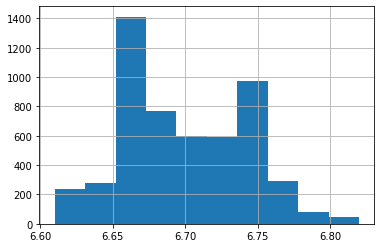

In [12]:
df_zip76023['solarPotential.climateFactor'].hist()

<AxesSubplot:>

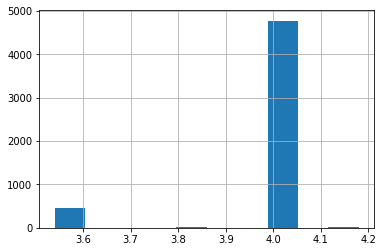

In [13]:
df_zip76023['solarPotential.electricityFactor'].hist()

<AxesSubplot:>

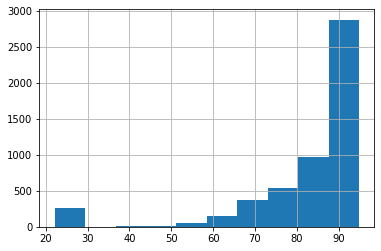

In [14]:
df_zip76023['solarPotential.sunScore'].hist()

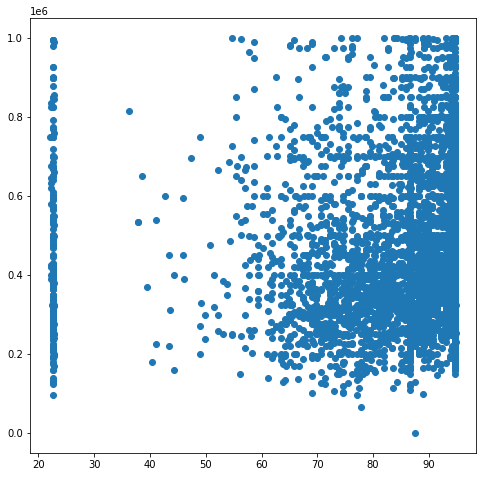

In [18]:
##No correlation
##We should not use sunScore
##But it's good to keep a dataframe of it
plt.figure(figsize = (8,8))
plt.scatter(df_test2.loc[df_test2['price'] <= 1000000]['solarPotential.sunScore'], df_test2.loc[df_test2['price'] <= 1000000]['price'])
plt.show()

In [19]:
def Sunscore_df(df):
    columns = [ 'zpid', 'solarPotential.buildFactor', 'solarPotential.climateFactor', 'solarPotential.electricityFactor', 
               'solarPotential.solarFactor', 'solarPotential.sunScore']
    sun_score_df = df[columns]
    return sun_score_df

In [21]:
sun_score_df = Sunscore_df(df_test2)

In [22]:
#sun_score_df.to_csv("Sunscore/June/Sunscore_June.csv")

### Read in the clean dataframe from pulling data from API extendedsearch

In [11]:
df_June = pd.read_csv('Clean_data_API_propertyExtendedSearch/June/cleaned_for_sales_houses_counties_June.csv')

In [12]:
df_June

,propertyType,lotArea,address,price,zpid,livingArea,bathrooms,bedrooms,country,currency,hasImage,listingSubType.is_newHome,listingSubType.is_FSBA,listingSubType.is_openHouse
0,SINGLE_FAMILY,30492.00,"2104 16th St, Bridgeport, TX 76426",145000,78936675,1072.0,1.0,2.0,USA,USD,True,False,True,False
1,SINGLE_FAMILY,13416.48,"509 Pettit Dr, Newark, TX 76071",157500,220112341,1316.0,1.0,3.0,USA,USD,True,False,True,False
2,SINGLE_FAMILY,14374.80,"813 E Highway 114, Boyd, TX 76023",199000,220098477,2849.0,2.0,3.0,USA,USD,True,False,True,False
3,SINGLE_FAMILY,8494.20,"105 Dodge City Ct, Newark, TX 76071",295000,118592172,1330.0,2.0,3.0,USA,USD,True,False,True,False
4,SINGLE_FAMILY,10628.64,"1412 Hovey St, Bridgeport, TX 76426",210000,78936620,1492.0,2.0,3.0,USA,USD,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,SINGLE_FAMILY,1652230.80,"4218 Fm 66, Waxahachie, TX 75167",1350000,67640330,2826.0,3.0,3.0,USA,USD,True,False,True,False
9155,SINGLE_FAMILY,461300.40,"971 Bells Chapel Rd, Waxahachie, TX 75165",1195000,67626300,3360.0,2.0,3.0,USA,USD,True,False,True,False
9156,SINGLE_FAMILY,1960200.00,"145 Hartsfield Dr, Waxahachie, TX 75165",1250000,2069193508,1680.0,2.0,2.0,USA,USD,True,False,True,False
9157,SINGLE_FAMILY,854690.76,"1765 N Mockingbird Ln, Midlothian, TX 76065",1995000,98880661,3640.0,4.0,4.0,USA,USD,True,False,True,False


In [13]:
df_test2[['zpid', 'livingAreaValue', 'price', 'resoFacts.pricePerSquareFoot']]

,zpid,livingAreaValue,price,resoFacts.pricePerSquareFoot
0,78936675,1072.0,145000,135.0
1,220112341,1316.0,157500,120.0
2,220098477,2849.0,199000,70.0
3,118592172,1330.0,295000,222.0
4,78936620,1492.0,210000,141.0
...,...,...,...,...
9056,67640330,2826.0,1350000,478.0
9057,67626300,3360.0,1195000,356.0
9058,2069193508,1680.0,1250000,744.0
9059,98880661,3640.0,1995000,548.0


In [11]:
df_June.loc[df_June['livingArea'] == 0]

,propertyType,lotArea,address,price,zpid,livingArea,bathrooms,bedrooms,country,currency,hasImage,listingSubType.is_newHome,listingSubType.is_FSBA,listingSubType.is_openHouse


In [12]:
df_test2.loc[df_test2['resoFacts.pricePerSquareFoot'].isnull()][['zpid', 'livingAreaValue', 'price', 'resoFacts.pricePerSquareFoot']]

,zpid,livingAreaValue,price,resoFacts.pricePerSquareFoot
3915,28920296,2256.0,0,NaN


In [13]:
df_sss = df_test2.loc[df_test2['resoFacts.pricePerSquareFoot'].isnull()][['zpid', 'livingAreaValue', 'price', 'resoFacts.pricePerSquareFoot']]

In [14]:
df_sss

,zpid,livingAreaValue,price,resoFacts.pricePerSquareFoot
3915,28920296,2256.0,0,NaN


In [15]:
df_sss2 = df_June.loc[df_June['zpid'] == 28920296]

In [16]:
df_June.loc[df_June['zpid'] == 28920296]

,propertyType,lotArea,address,price,zpid,livingArea,bathrooms,bedrooms,country,currency,hasImage,listingSubType.is_newHome,listingSubType.is_FSBA,listingSubType.is_openHouse
3945,SINGLE_FAMILY,6969.6,"9457 Lechner Rd, Fort Worth, TX 76179",355000,28920296,2256.0,2.0,3.0,USA,USD,True,False,True,False


In [17]:
##Price/living area
1350000/2826

477.7070063694268

In [18]:
df_test2.loc[df_test2['resoFacts.pricePerSquareFoot'].isnull()]['zpid'].tolist()

[28920296]

In [14]:
##Fill null pricePerSquareFoot, price, or living area
##We will take data from the clean api to put it in
##If it shows up 0, then we drop the house
##Goal: df_houses_properties would be our main dataframe while API_extendedSearch

def fill_null_price(df_houses_properties, df_API):
    ##look for zpid that does not have a price tag with it
    zpid_list = df_houses_properties.loc[(df_houses_properties['resoFacts.pricePerSquareFoot'].isnull()) | 
                                         (df_houses_properties['price'].isnull()) | 
                                         (df_houses_properties['livingAreaValue'].isnull()) |
                                         (df_houses_properties['resoFacts.pricePerSquareFoot'] == 0) | 
                                         (df_houses_properties['price'] == 0) |
                                         (df_houses_properties['livingAreaValue'] == 0)]['zpid'].tolist()
    
    ##fill in the price columns with the house api
    for zpid in zpid_list:
        price_api = df_API.loc[df_API['zpid'] == zpid]['price'].tolist()[0]
        livingArea_api = df_API.loc[df_API['zpid'] == zpid]['livingArea'].tolist()[0]
        if (price_api != 0) and (not pd.isnull(price_api)) and (livingArea_api != 0) and (not pd.isnull(livingArea_api)):
            df_houses_properties.loc[df_houses_properties['zpid'] == zpid, 'price'] = price_api
            df_houses_properties.loc[df_houses_properties['zpid'] == zpid, 'livingAreaValue'] = livingArea_api
        df_houses_properties.loc[df_houses_properties['zpid'] == zpid, 'resoFacts.pricePerSquareFoot'] = np.round(price_api/livingArea_api)
    return df_houses_properties

In [15]:
df_test2 = fill_null_price(df_test2, df_June)

In [21]:
df_test2.loc[df_test2['zpid'] == 28920296][['zpid', 'livingAreaValue', 'price', 'resoFacts.pricePerSquareFoot']]

,zpid,livingAreaValue,price,resoFacts.pricePerSquareFoot
3915,28920296,2256.0,355000,157.0


In [36]:
df_June.loc[df['zpid'] == 28920296]

,propertyType,lotArea,address,price,zpid,livingArea,bathrooms,bedrooms,country,currency,hasImage,listingSubType.is_newHome,listingSubType.is_FSBA,listingSubType.is_openHouse
3945,SINGLE_FAMILY,6969.6,"9457 Lechner Rd, Fort Worth, TX 76179",355000,28920296,2256.0,2.0,3.0,USA,USD,True,False,True,False


In [25]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

### Private pool (Checked)

In [26]:
df_dict.keys()

dict_keys(['resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures', 'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials', 'resoFacts.vegetation', 'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures', 'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 'resoFacts.propertySubType', 'resoFacts.securityFeatures', 'resoFacts.associationFeeIncludes', 'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 'resoFacts.poolFeatures'])

In [16]:
##Fill null pools based on pools features
##So there are houses that have pools but we dont know the features
##So poolFeatures_pool means it has a pool, some people dont write all of the features out
##Null means no private pools

def fix_pool_variable(df_house_properties, df_dict):
    ##Fill null values with 0's
    df_house_properties.loc[df_house_properties['resoFacts.hasPrivatePool'].isnull(), 'resoFacts.hasPrivatePool'] = False
    
    ##Flip None to 0 and pool to 1 for houses with private pools
    df_poolFeatures = df_dict['resoFacts.poolFeatures']
    zpid_list = df_house_properties.loc[df_house_properties['resoFacts.hasPrivatePool'] == True]['zpid'].tolist()
    df_poolFeatures.loc[df_poolFeatures['zpid'].isin(zpid_list), 'poolFeatures_None'] = 0
    df_poolFeatures.loc[df_poolFeatures['zpid'].isin(zpid_list), 'poolFeatures_Pool'] = 1
    df_dict['resoFacts.poolFeatures'] = df_poolFeatures
    return df_house_properties, df_dict

In [17]:
df_test2, df_dict = fix_pool_variable(df_test2, df_dict)

/tmp/ipykernel_146/2255149970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poolFeatures.loc[df_poolFeatures['zpid'].isin(zpid_list), 'poolFeatures_None'] = 0
/tmp/ipykernel_146/2255149970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poolFeatures.loc[df_poolFeatures['zpid'].isin(zpid_list), 'poolFeatures_Pool'] = 1


In [12]:
zpid_pool_true = df_test2.loc[df_test2['resoFacts.hasPrivatePool'] == True]['zpid'].tolist()
df_3333 = df_dict['resoFacts.poolFeatures']
zpid_littt = list()
for zpid in zpid_pool_true:
    if df_3333.loc[df_3333['zpid'] == zpid]['poolFeatures_None'].tolist()[0] == 1:
        zpid_littt.append(zpid)

In [30]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

In [31]:
list(df_dict.keys())

['resoFacts.patioAndPorchFeatures',
 'resoFacts.waterSource',
 'resoFacts.exteriorFeatures',
 'resoFacts.interiorFeatures',
 'resoFacts.communityFeatures',
 'resoFacts.constructionMaterials',
 'resoFacts.vegetation',
 'resoFacts.greenEnergyEfficient',
 'resoFacts.foundationDetails',
 'resoFacts.utilities',
 'resoFacts.appliances',
 'resoFacts.flooring',
 'resoFacts.parkingFeatures',
 'resoFacts.lotFeatures',
 'resoFacts.fireplaceFeatures',
 'resoFacts.laundryFeatures',
 'resoFacts.propertySubType',
 'resoFacts.securityFeatures',
 'resoFacts.associationFeeIncludes',
 'resoFacts.cooling',
 'resoFacts.windowFeatures',
 'resoFacts.heating',
 'resoFacts.sewer',
 'resoFacts.poolFeatures']

## Cooling

In [13]:
###Every house here has a cooling system so None is invalid
##We should say house cooling other if we dont know what system it has
df_dict['resoFacts.cooling'].columns.tolist()

['zpid',
 'cooling_CeilingFan(s)',
 'cooling_WindowUnit(s)',
 'cooling_CentralAir',
 'cooling_None',
 'cooling_Other',
 'cooling_Electric',
 'cooling_AtticFan',
 'cooling_MultiUnits',
 'cooling_WallUnit(s)',
 'cooling_Central',
 'cooling_Gas',
 'cooling_HeatPump',
 'cooling_Wall/WindowUnit(s)',
 'cooling_ENERGYSTARQualifiedEquipment',
 'cooling_Zoned',
 'cooling_RoofTurbine(s)',
 'cooling_HumidityControl',
 'cooling_EvaporativeCooling',
 'cooling_Geothermal',
 'cooling_CentralElectric',
 'cooling_Wall']

In [33]:
p_list = df_test2.loc[df_test2['resoFacts.hasCooling'] == True]['zpid'].tolist()
df_test2.loc[df_test2['resoFacts.hasCooling'].isnull()][['zpid', 'streetAddress', 'city', 'price']]

,zpid,streetAddress,city,price
3566,230781446,944 Land Of Goshen Dr,Springtown,865000
6188,2063051562,408 Wilshire Rd,San Marcos,391990
6233,26842770,10532 Shiloh Rd,Dallas,347000
6259,2063256124,427 Wilshire Rd,San Marcos,362990
6283,2063166208,420 Wilshire Rd,San Marcos,363990
6292,2063255829,416 Wilshire Rd,San Marcos,367990
6404,2063051407,307 Wilshire Rd,San Marcos,427990
6496,2063051480,432 Wilshire Rd,San Marcos,416990
7302,26759825,9818 Hathaway St,Dallas,5950000
7516,28900072,520 Shannon Dr,Rockwall,415000


In [34]:
df_coolFeatures = df_dict['resoFacts.cooling']
df_coolFeatures.loc[(df_coolFeatures['zpid'].isin(p_list)) & (df_coolFeatures['cooling_None'] == 1)]

,zpid,cooling_CeilingFan(s),cooling_WindowUnit(s),cooling_CentralAir,cooling_None,cooling_Other,cooling_Electric,cooling_AtticFan,cooling_MultiUnits,cooling_WallUnit(s),...,cooling_HeatPump,cooling_Wall/WindowUnit(s),cooling_ENERGYSTARQualifiedEquipment,cooling_Zoned,cooling_RoofTurbine(s),cooling_HumidityControl,cooling_EvaporativeCooling,cooling_Geothermal,cooling_CentralElectric,cooling_Wall
2,220098477,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,251224408,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1706,2062998720,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,26677598,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,62612498,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,53127919,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3638,28997349,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,29137382,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3654,29098437,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3655,29049138,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
zpid1123 = df_coolFeatures.loc[(df_coolFeatures['zpid'].isin(p_list)) & (df_coolFeatures['cooling_None'] == 1)]['zpid'].tolist()
df_test2.loc[df_test2['zpid'].isin(zpid1123)][['zpid', 'streetAddress', 'city', 'price']]

,zpid,streetAddress,city,price
2,220098477,813 E Highway 114,Boyd,199000
451,251224408,1013 W 7th St,Justin,330000
1693,2062998720,804/802 Canal St,McKinney,235000
1712,26677598,6122 Fm 455,Celina,275000
1776,62612498,800 Chickesaw Ln,Wylie,325000
2357,53127919,3222 Almeta Ln,McKinney,650000
3609,28997349,5225 N Hampshire Blvd,Fort Worth,120000
3611,29137382,4205 5th Ave,Fort Worth,165000
3625,29098437,5004 McCart Ave,Fort Worth,183900
3626,29049138,3408 Fairview St,Fort Worth,199500


In [18]:
##Just fill None coolings with 'Other'
def fix_cooling_variable(df_house_properties, df_dict):
    df_house_properties.loc[df_house_properties['resoFacts.hasCooling'].isnull(), 'resoFacts.hasCooling'] = True
    df_cooling = df_dict['resoFacts.cooling']
    df_cooling.loc[df_cooling['cooling_None'] == 1, 'cooling_Other'] = 1
    df_cooling.loc[df_cooling['cooling_None'] == 1, 'cooling_None'] = 0
    df_dict['resoFacts.cooling'] = df_cooling
    return df_house_properties, df_dict

In [19]:
df_test2, df_dict = fix_cooling_variable(df_test2, df_dict)

/tmp/ipykernel_146/4175278790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cooling.loc[df_cooling['cooling_None'] == 1, 'cooling_Other'] = 1
/tmp/ipykernel_146/4175278790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cooling.loc[df_cooling['cooling_None'] == 1, 'cooling_None'] = 0


In [38]:
df_coolFeatures2 = df_dict['resoFacts.cooling']
df_coolFeatures2.loc[df_coolFeatures2['cooling_None'] == 1]

,zpid,cooling_CeilingFan(s),cooling_WindowUnit(s),cooling_CentralAir,cooling_None,cooling_Other,cooling_Electric,cooling_AtticFan,cooling_MultiUnits,cooling_WallUnit(s),...,cooling_HeatPump,cooling_Wall/WindowUnit(s),cooling_ENERGYSTARQualifiedEquipment,cooling_Zoned,cooling_RoofTurbine(s),cooling_HumidityControl,cooling_EvaporativeCooling,cooling_Geothermal,cooling_CentralElectric,cooling_Wall


In [39]:
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

## Heating

In [40]:
##Every modern house has heating and cooling
##Use the same cooling function for heating
df_test2['resoFacts.hasHeating'].value_counts()

True    9054
Name: resoFacts.hasHeating, dtype: int64

In [41]:
df_dict['resoFacts.heating'].columns.tolist()

['zpid',
 'heating_SpaceHeater',
 'heating_Central',
 'heating_None',
 'heating_Other',
 'heating_Electric',
 'heating_NaturalGas',
 'heating_Forcedair',
 'heating_Fireplace(s)',
 'heating_HeatPump',
 'heating_Propane',
 'heating_WallFurnace',
 'heating_Solar',
 'heating_ENERGYSTARQualifiedEquipment',
 'heating_ENERGYSTAR/ACCARSIQualifiedInstallation',
 'heating_Zoned',
 'heating_GasJets',
 'heating_PassiveSolar',
 'heating_FireplaceInsert',
 'heating_ActiveSolar',
 'heating_HumidityControl',
 'heating_WoodStove',
 'heating_FloorFurnance',
 'heating_Gas',
 'heating_Geothermal',
 'heating_PelletStove',
 'heating_Heatpump',
 'heating_CentralElectric',
 'heating_Central/Electric']

In [20]:
def fix_heating_variable(df_house_properties, df_dict):
    df_house_properties.loc[df_house_properties['resoFacts.hasHeating'].isnull(), 'resoFacts.hasHeating'] = True
    df_heating = df_dict['resoFacts.heating']
    df_heating.loc[df_heating['heating_None'] == 1, 'heating_Other'] = 1
    df_heating.loc[df_heating['heating_None'] == 1, 'heating_None'] = 0
    df_dict['resoFacts.heating'] = df_heating
    return df_house_properties, df_dict

In [21]:
df_test2, df_dict = fix_heating_variable(df_test2, df_dict)

/tmp/ipykernel_146/1584024390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heating.loc[df_heating['heating_None'] == 1, 'heating_Other'] = 1
/tmp/ipykernel_146/1584024390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heating.loc[df_heating['heating_None'] == 1, 'heating_None'] = 0


In [44]:
df_dict['resoFacts.heating']

,zpid,heating_SpaceHeater,heating_Central,heating_None,heating_Other,heating_Electric,heating_NaturalGas,heating_Forcedair,heating_Fireplace(s),heating_HeatPump,...,heating_ActiveSolar,heating_HumidityControl,heating_WoodStove,heating_FloorFurnance,heating_Gas,heating_Geothermal,heating_PelletStove,heating_Heatpump,heating_CentralElectric,heating_Central/Electric
0,78936675,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,220112341,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220098477,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118592172,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78936620,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,67640330,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9155,67626300,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9156,2069193508,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9157,98880661,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_test2['School_district'].unique()

array(['Bridgeport ISD', 'Northwest ISD', 'Boyd ISD', 'Decatur ISD',
       'Alvord ISD', 'Chico ISD', 'Paradise ISD', 'Slidell ISD',
       'Springtown ISD', 'Weatherford ISD', 'Krum ISD', 'Azle ISD',
       'Poolville ISD', 'Ponder ISD', 'Pilot Point ISD', 'Aubrey ISD',
       'Denton ISD', 'Lewisville ISD', 'Lake Dallas ISD',
       'Carrollton-Farmers Branch ISD', 'Sanger ISD', 'Little Elm ISD',
       'Argyle ISD', 'Frisco ISD', 'Prosper ISD', 'Celina ISD',
       'Carroll ISD', 'Keller ISD', 'Plano ISD', 'Blue Ridge ISD',
       'Farmersville ISD', 'Wylie ISD', 'Community ISD', 'Princeton ISD',
       'Anna ISD', 'McKinney ISD', 'Allen ISD', 'Melissa ISD',
       'Royse City ISD', 'Bland ISD', 'Van Alstyne ISD', 'Lovejoy ISD',
       'Whitewright ISD', 'Leonard ISD', 'Millsap ISD', 'Aledo ISD',
       'Brock ISD', 'Granbury ISD', 'Peaster ISD', 'Fort Worth ISD',
       'Garner ISD', 'Perrin-Whitt Cons ISD', 'Mineral Wells ISD',
       'Mansfield ISD', 'Arlington ISD', 'White Sett

In [45]:
#sqlalchemy
all_null_vals(df_test2)

Null in zpid: 0
Null in isListedByOwner: 1
Null in resoFacts.yearBuilt: 0
Null in resoFacts.hasAssociation: 0
Null in annualHomeownersInsurance: 0
Null in monthlyHoaFee: 0
Null in resoFacts.hoaFee: 0
Null in schools: 0
Null in Elementary_rating: 0
Null in Elementary_distance: 0
Null in Elementary_name: 0
Null in Elementary_studentsPerTeacher: 0
Null in Elementary_size: 0
Null in Elementary_grades: 0
Null in Elementary_type: 0
Null in Middle_rating: 237
Null in Middle_distance: 237
Null in Middle_name: 237
Null in Middle_studentsPerTeacher: 237
Null in Middle_size: 237
Null in Middle_grades: 237
Null in Middle_type: 237
Null in High_rating: 119
Null in High_distance: 119
Null in High_name: 119
Null in High_studentsPerTeacher: 119
Null in High_size: 119
Null in High_grades: 119
Null in High_type: 119
Null in solarPotential.sunScore: 3791
Null in solarPotential.buildFactor: 3791
Null in solarPotential.climateFactor: 3791
Null in solarPotential.electricityFactor: 3791
Null in solarPotentia

# Structure Type

In [18]:
df_test2['resoFacts.structureType'].unique()

array(['Single Detached',
       'Manufactured (certificate exch),Mobile Doublewide w/Land,Single Detached',
       'Mobile Doublewide w/Land',
       'Lake House,Single Detached,Vacation Home',
       'Mobile Singlewide w/Land',
       'Mobile Singlewide w/Land,Single Detached', 'Lake House',
       'Farm/Ranch House,Single Detached', 'Farm/Ranch House',
       'Attached or 1/2 Duplex', 'Manufactured (certificate exch)',
       'Manufactured (certificate exch),Mobile Doublewide w/Land',
       'Lake House,Vacation Home', 'Resort Property,Single Detached',
       'Lake House,Resort Property,Single Detached,Vacation Home',
       'Log Cabin',
       'Farm/Ranch House,Mobile Doublewide w/Land,Single Detached',
       'Garden/Zero Lot Line,Single Detached',
       'Lake House,Single Detached', 'Garden/Zero Lot Line',
       'Farm/Ranch House,Mobile Doublewide w/Land,Resort Property,Vacation Home',
       'Apartment,Farm/Ranch House,Single Detached',
       'Apartment,Mobile Doublewide w/L

In [19]:
df_test2['resoFacts.architecturalStyle'].unique()

array(['Traditional', nan, 'Other', 'Barndominium,Traditional', 'A-Frame',
       'Ranch', 'Barndominium', 'Prairie', 'Mediterranean',
       'Craftsman,Modern Farmhouse,Traditional', 'Contemporary/Modern',
       'Modern Farmhouse', 'Modern Farmhouse,Traditional', 'Craftsman',
       'Ranch,Traditional', 'Geo/Dome',
       'Contemporary/Modern,Modern Farmhouse', 'A-Frame,Other',
       'Colonial', 'Contemporary/Modern,French,Traditional',
       'Mid-Century Modern,Traditional',
       'Contemporary/Modern,Traditional', 'Craftsman,Traditional',
       'Traditional,Other', 'Split Level,Traditional', 'Tudor',
       'French,Traditional', 'Southwestern,Traditional', 'English',
       'English,Other', 'Contemporary/Modern,Ranch',
       'Contemporary/Modern,Mediterranean', 'English,Traditional',
       'Craftsman,French,Modern Farmhouse,Traditional,Tudor',
       'Contemporary/Modern,Mid-Century Modern', 'Craftsman,French,Other',
       'French,Other', 'Contemporary/Modern,Modern Farmhous

In [20]:
df_test2['resoFacts.fencing'].unique()

array([nan, 'Chain Link', 'Wood', 'Back Yard,Wrought Iron',
       'Chain Link,Fenced', 'Back Yard,Chain Link,Partial',
       'Chain Link,Privacy', 'Chain Link,Wood', 'Back Yard,Chain Link',
       'None', 'Barbed Wire', 'Back Yard,Barbed Wire', 'Other',
       'Back Yard,Rock/Stone,Wood', 'Cross Fenced,Wood', 'Cross Fenced',
       'Back Yard,Wood', 'Wire', 'Wrought Iron', 'Barbed Wire,Pipe',
       'Metal,Wood', 'Wood,Wrought Iron', 'Wrought Iron,Wood',
       'Barbed Wire,Wrought Iron', 'Fenced',
       'Back Yard,Chain Link,Cross Fenced,Fenced,Front Yard,Full,Privacy,Split Rail,Vinyl,Wood',
       'Barbed Wire,Partial', 'Barbed Wire,Cross Fenced,Pipe',
       'Cross Fenced,Fenced,Metal', 'Back Yard,Chain Link,Gate',
       'Back Yard,Chain Link,Cross Fenced,Perimeter,Pipe,Wire',
       'Back Yard', 'Barbed Wire,Other', 'Fenced,Wire',
       'Back Yard,Gate,Privacy,Wood', 'Block,Metal,Wood',
       'Back Yard,Fenced,Wood,Other',
       'Barbed Wire,Cross Fenced,Wire,Other', 'Barbed

In [23]:
n1 = df_test2['resoFacts.fencing'].unique()[5]
n1
n1.split(',')

['Back Yard', 'Chain Link', 'Partial']

In [ ]:
##Macro trends

In [ ]:
##Create a function that deals with multiple variable like this
##Then create new keys for df_dict that holds these values

##Create a unique variable list
def categorical_features_generator(df, col):
    list_feature = list()
    list_temp = df[col].unique()
    for feature in list_temp:
        list1 = feature.split(',')
        for value in list1:
            if value not in list_feature:
                list_feature.append(value)
    return list_feature


#def extract_categorical_features(variables):
    #v = variables.split(',')
    #return v

In [30]:
##Have to add the lot area to the dataframe
df_June

,propertyType,lotArea,address,price,zpid,livingArea,bathrooms,bedrooms,country,currency,hasImage,listingSubType.is_newHome,listingSubType.is_FSBA,listingSubType.is_openHouse
0,SINGLE_FAMILY,30492.00,"2104 16th St, Bridgeport, TX 76426",145000,78936675,1072.0,1.0,2.0,USA,USD,True,False,True,False
1,SINGLE_FAMILY,13416.48,"509 Pettit Dr, Newark, TX 76071",157500,220112341,1316.0,1.0,3.0,USA,USD,True,False,True,False
2,SINGLE_FAMILY,14374.80,"813 E Highway 114, Boyd, TX 76023",199000,220098477,2849.0,2.0,3.0,USA,USD,True,False,True,False
3,SINGLE_FAMILY,8494.20,"105 Dodge City Ct, Newark, TX 76071",295000,118592172,1330.0,2.0,3.0,USA,USD,True,False,True,False
4,SINGLE_FAMILY,10628.64,"1412 Hovey St, Bridgeport, TX 76426",210000,78936620,1492.0,2.0,3.0,USA,USD,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,SINGLE_FAMILY,1652230.80,"4218 Fm 66, Waxahachie, TX 75167",1350000,67640330,2826.0,3.0,3.0,USA,USD,True,False,True,False
9155,SINGLE_FAMILY,461300.40,"971 Bells Chapel Rd, Waxahachie, TX 75165",1195000,67626300,3360.0,2.0,3.0,USA,USD,True,False,True,False
9156,SINGLE_FAMILY,1960200.00,"145 Hartsfield Dr, Waxahachie, TX 75165",1250000,2069193508,1680.0,2.0,2.0,USA,USD,True,False,True,False
9157,SINGLE_FAMILY,854690.76,"1765 N Mockingbird Ln, Midlothian, TX 76065",1995000,98880661,3640.0,4.0,4.0,USA,USD,True,False,True,False


In [34]:
df_dict['resoFacts.lotFeatures'].columns.tolist()

['zpid',
 'lotFeatures_Level',
 'lotFeatures_ManyTrees',
 'lotFeatures_None',
 'lotFeatures_CornerLot',
 'lotFeatures_Cul-De-Sac',
 'lotFeatures_Lrg.BackyardGrass',
 'lotFeatures_FewTrees',
 'lotFeatures_Acreage',
 'lotFeatures_InteriorLot',
 'lotFeatures_Subdivided',
 'lotFeatures_AdjacenttoGreenbelt',
 'lotFeatures_IrregularLot',
 'lotFeatures_Landscaped',
 'lotFeatures_Cleared',
 'lotFeatures_OnGolfCourse',
 'lotFeatures_Waterfront',
 'lotFeatures_SprinklerSystem',
 'lotFeatures_Pasture',
 'lotFeatures_Mesquite',
 'lotFeatures_Tank/Pond',
 'lotFeatures_RollingSlope',
 'lotFeatures_Agricultural',
 'lotFeatures_Brush',
 'lotFeatures_Oak',
 'lotFeatures_Other',
 'lotFeatures_Hilly',
 'lotFeatures_Cedar',
 'lotFeatures_Sloped',
 'lotFeatures_Gullies',
 'lotFeatures_Varied',
 'lotFeatures_Greenbelt',
 'lotFeatures_Undivided',
 'lotFeatures_Bottom',
 'lotFeatures_NoBackyardGrass',
 'lotFeatures_ZeroLotLine',
 'lotFeatures_Leasehold',
 'lotFeatures_Airstrip',
 'lotFeatures_Pine',
 'lotFeat

In [50]:
df_June.columns.tolist()

['propertyType',
 'lotArea',
 'address',
 'price',
 'zpid',
 'livingArea',
 'bathrooms',
 'bedrooms',
 'country',
 'currency',
 'hasImage',
 'listingSubType.is_newHome',
 'listingSubType.is_FSBA',
 'listingSubType.is_openHouse']

### Crime rate dataset

In [20]:
def text_to_df(file_path):
    with open(file_path, 'r') as f:
        data = f.readlines()
    frame = list()
    for i in range(len(data)):
        row = data[i].split()
        if len(row) == 5:
            row_fix = [row[0] + ' ' + row[1], row[2], row[3], row[4]]
            frame.append(row_fix)
        else:
            frame.append(row)
    cols= ["County", "2020", "2021", "% Change"]
    df = pd.DataFrame(frame, columns = cols)
    return df

In [22]:
file_path = 'Crime_rate/2021/Crime_rate_2021.txt'
crime_df = text_to_df(file_path)

In [23]:
crime_df

,County,2020,2021,% Change
0,Anderson,23.43,15.1,-35.55
1,Andrews,30.32,20.16,-33.51
2,Angelina,48.43,30.78,-36.44
3,Aransas,49.37,37.26,-24.53
4,Archer,2.95,1.28,-56.61
...,...,...,...,...
249,Wood,13.18,14.17,7.51
250,Yoakum,9.79,15.39,57.20
251,Young,15.7,15,-4.46
252,Zapata,13.29,8.69,-34.61


In [24]:
crime_df.to_csv('Crime_rate/2021/Crime_rate_2021.csv', index = False)

In [28]:
##Crime by County per 1000 population
crime_df.loc[(crime_df['County'] == 'Collin') | (crime_df['County'] == 'Tarrant') | (crime_df['County'] == 'Dallas') |
             (crime_df['County'] == 'Denton') | (crime_df['County'] == 'Ellis')][['County', '2021']]

,County,2021
42,Collin,14.98
56,Dallas,45.45
61,Denton,20.65
70,Ellis,20.01
219,Tarrant,39.04
